In [1]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [4]:
# Load raw data

sample = pd.read_csv('../data/raw/sample_submission.csv')
test = pd.read_csv('../data/raw/test.csv')
train = pd.read_csv('../data/raw/train.csv')

# View head of train set
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
# Number of rows and columns
print(train.shape)

# Snapshot of first 5 rows
print(train.head())


(200000, 202)
   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635 

In [14]:
# Summary of each feature in the dataset

pd.set_option('display.max_columns', None)

train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

Histogram of all features


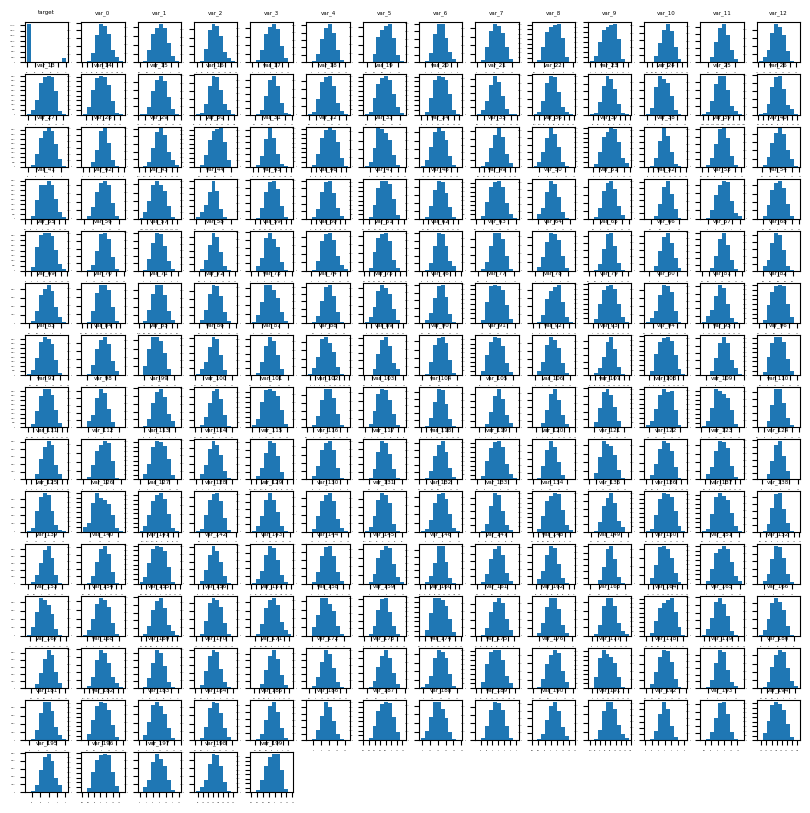

In [15]:
# Plot histogram of all features

import matplotlib

params = {
    'axes.titlesize':'4',
    'xtick.labelsize':'0',
    'ytick.labelsize':'0'
}
matplotlib.rcParams.update(params)

train.hist(bins=10, grid=False, ylabelsize=0, xlabelsize=0, figsize=(10,10))

print("Histogram of all features")

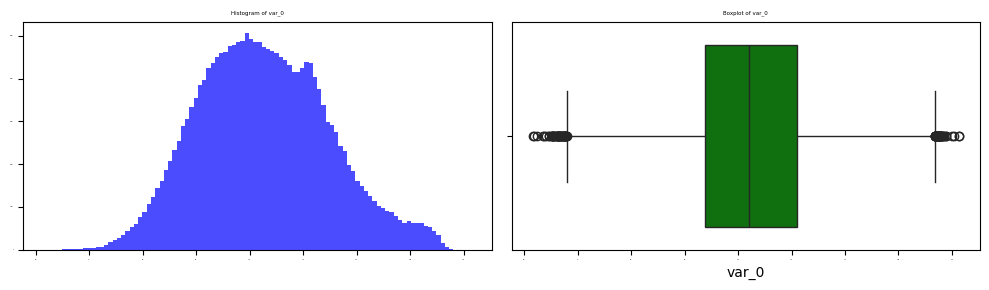

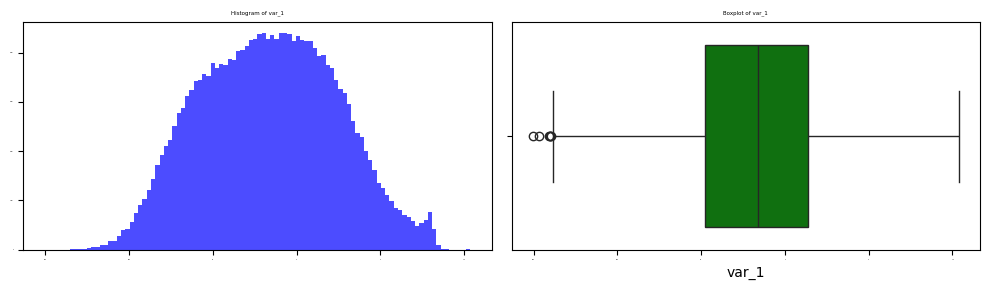

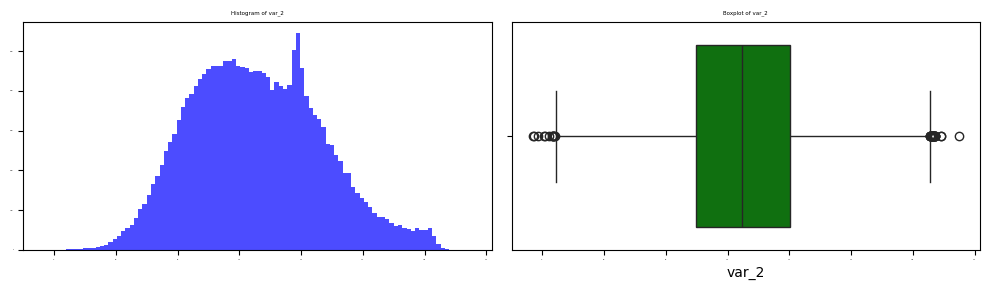

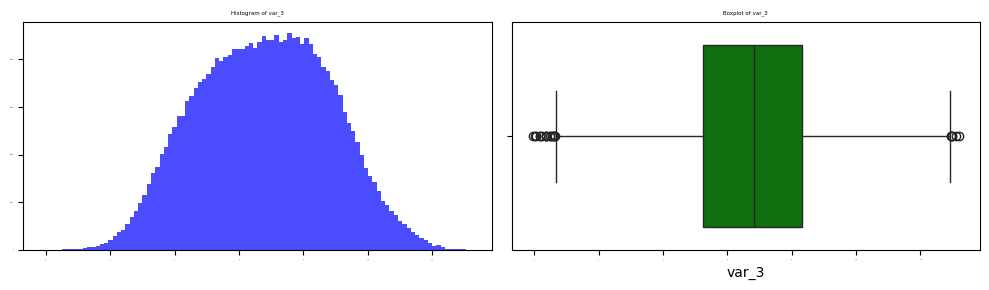

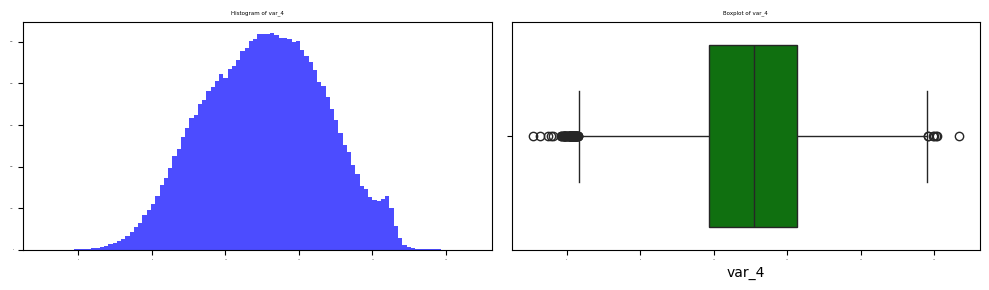

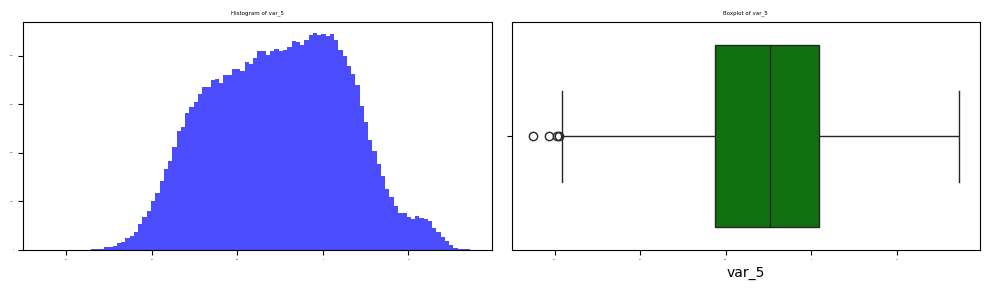

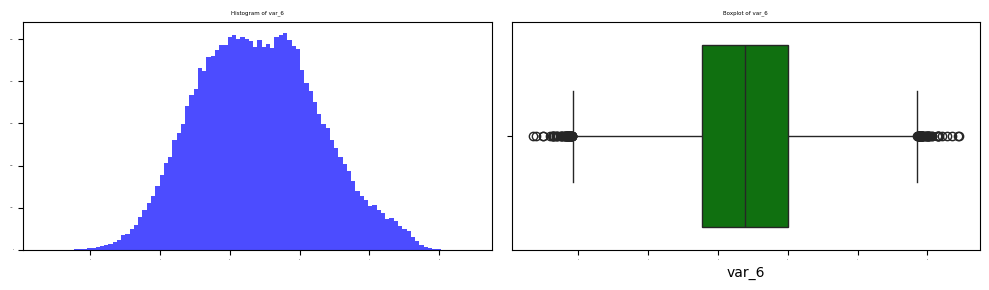

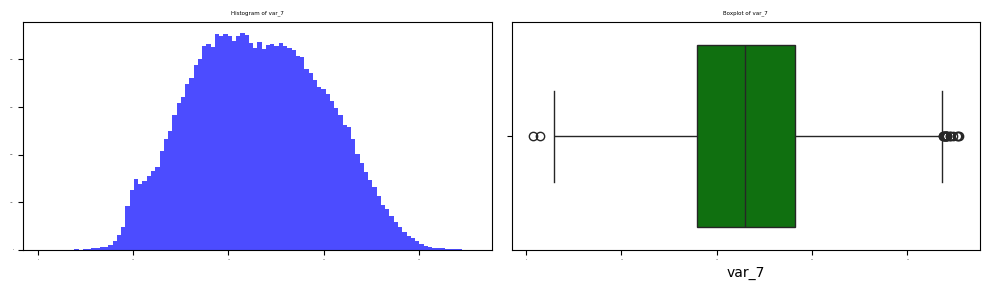

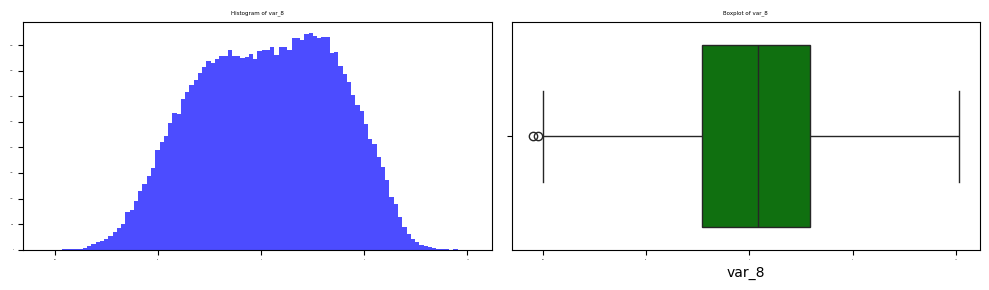

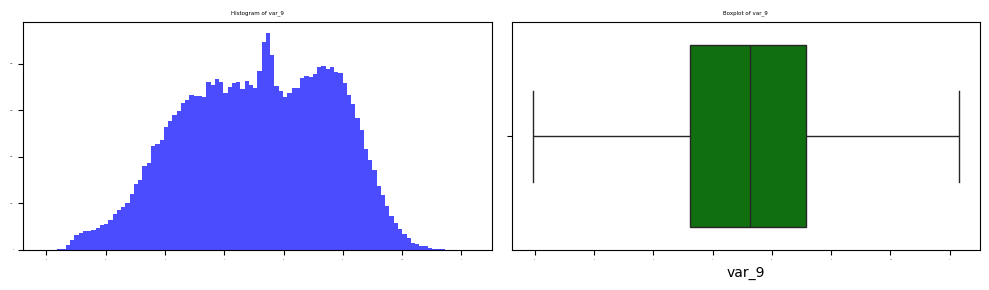

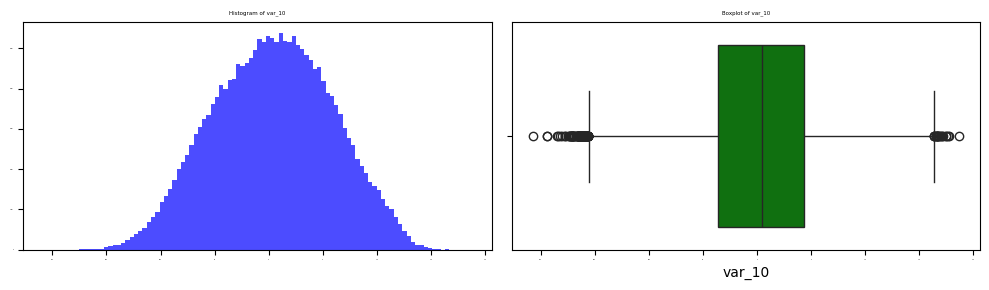

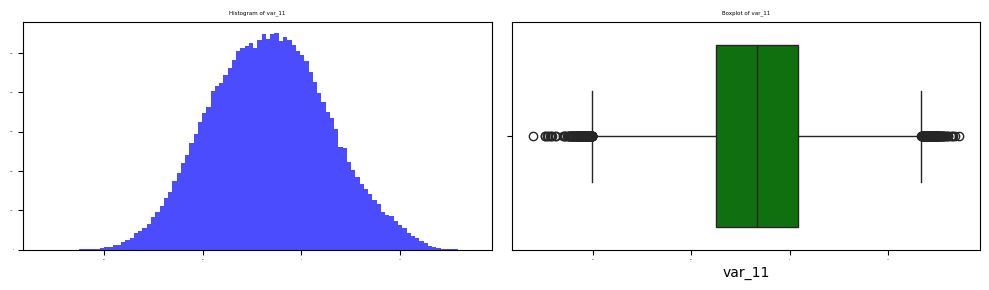

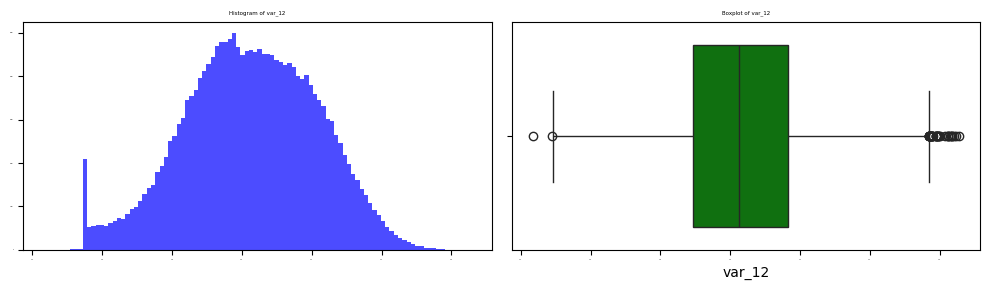

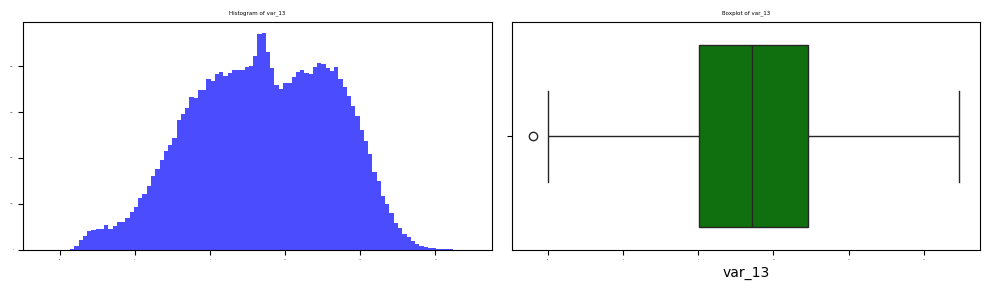

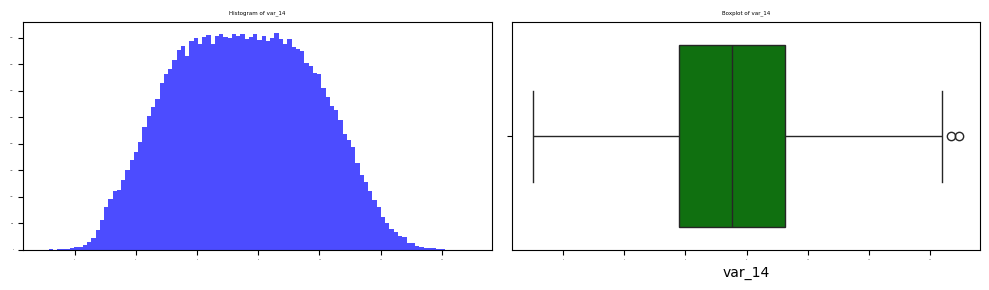

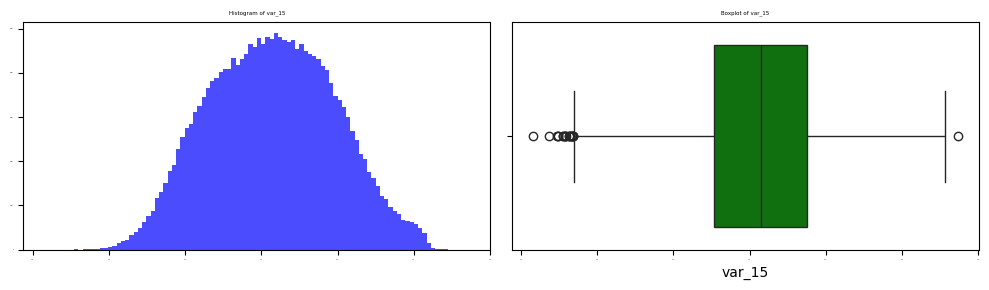

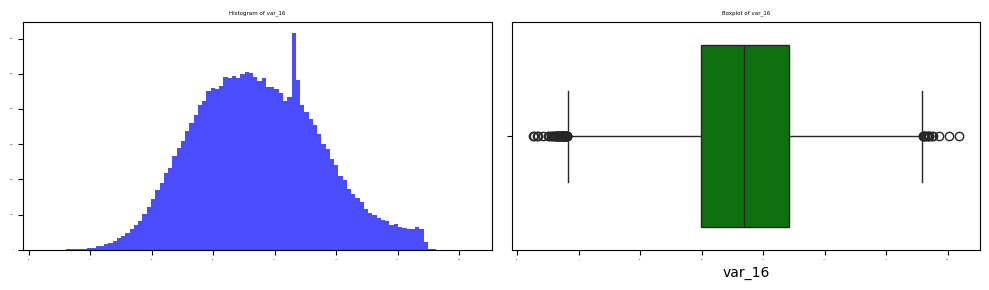

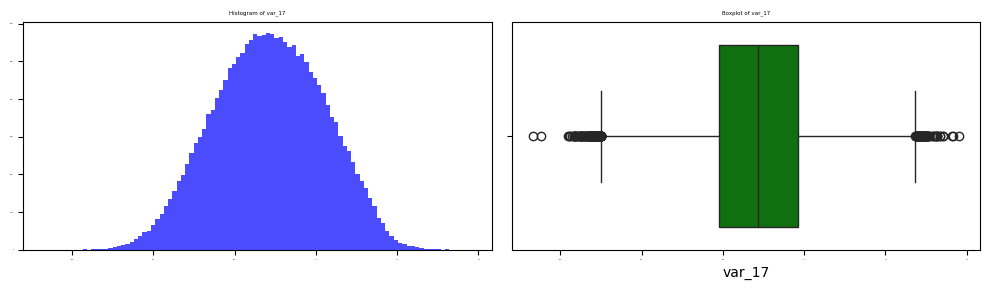

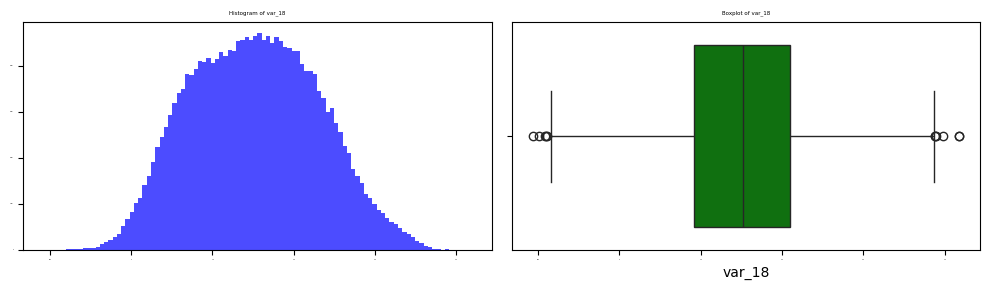

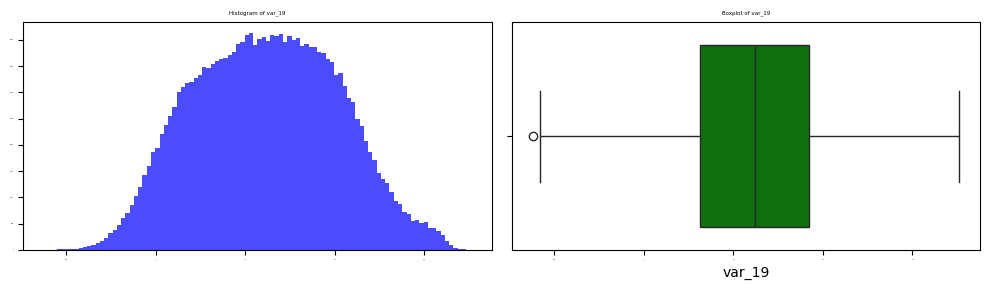

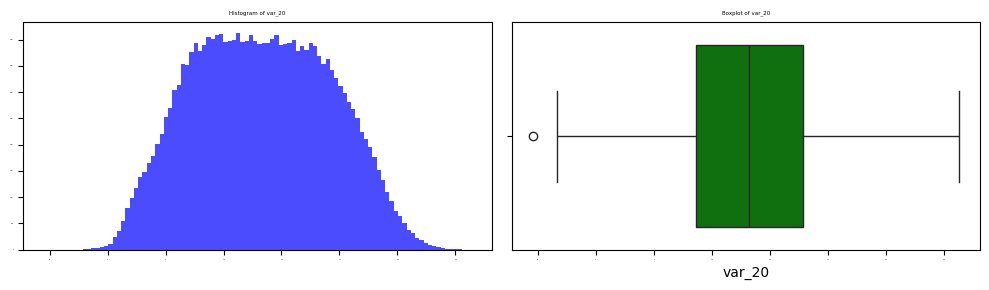

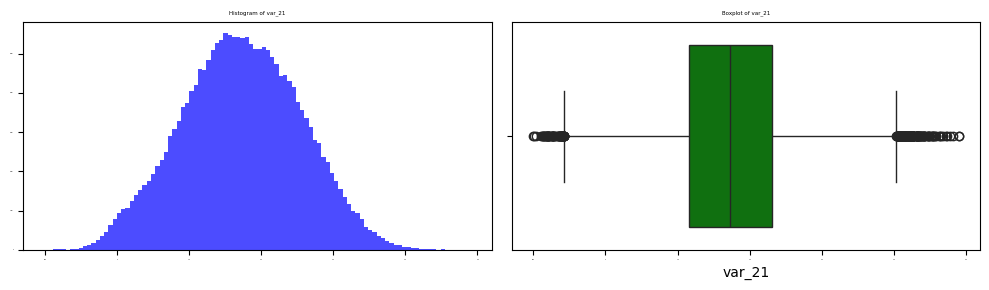

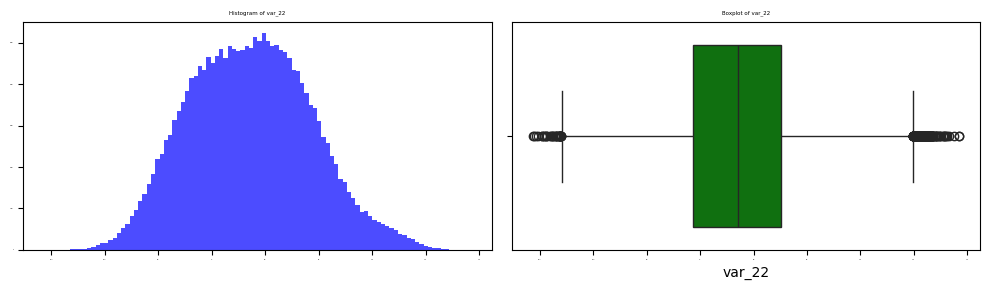

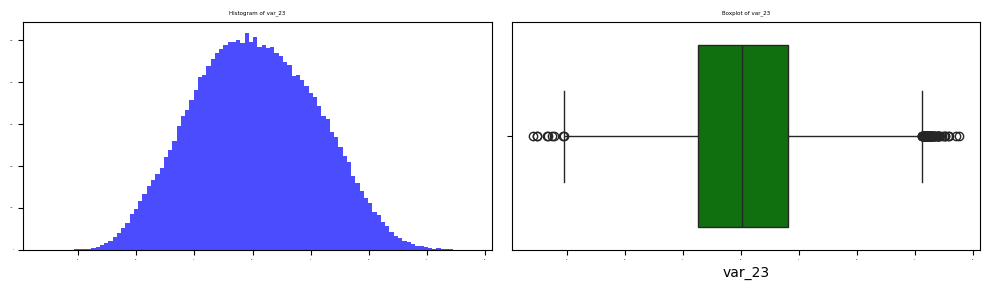

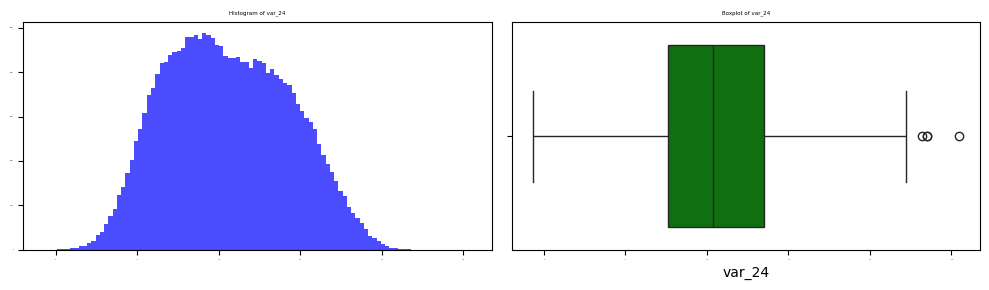

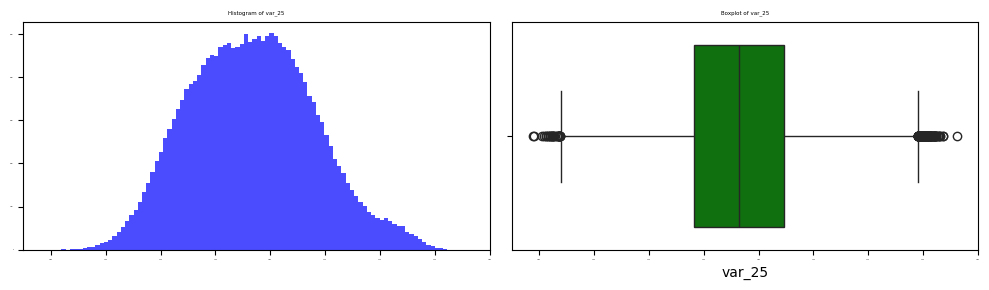

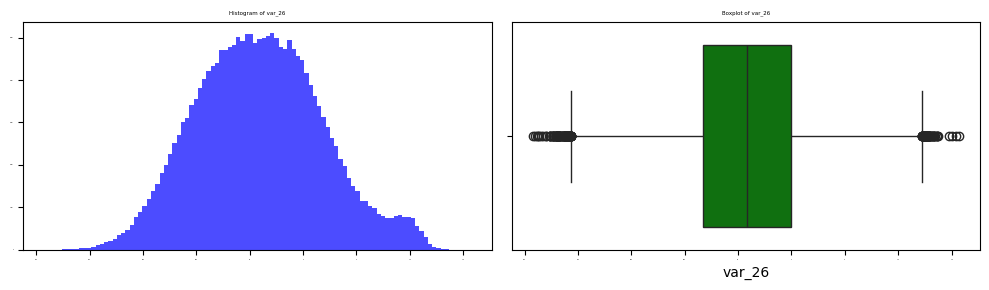

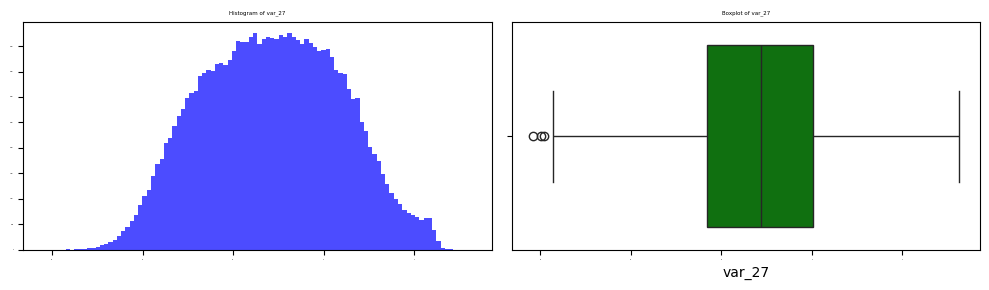

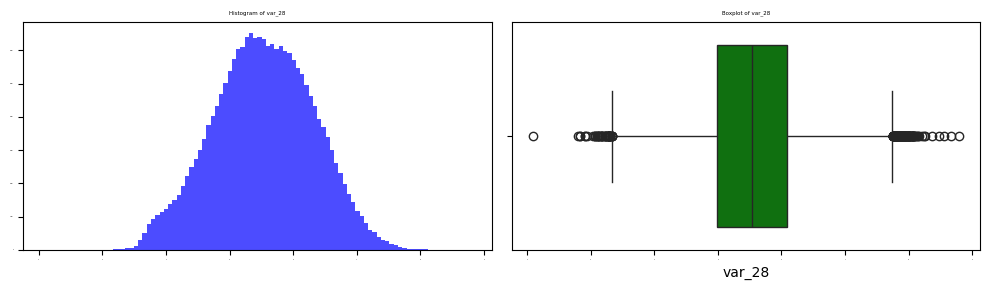

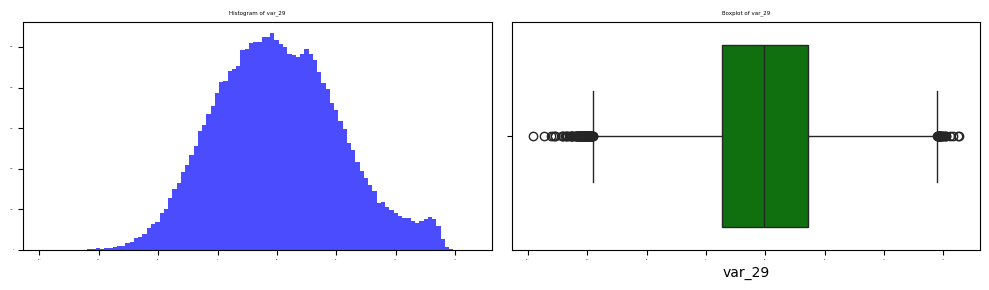

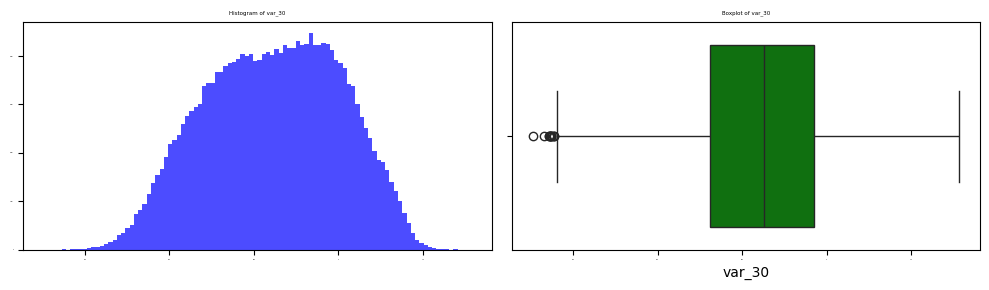

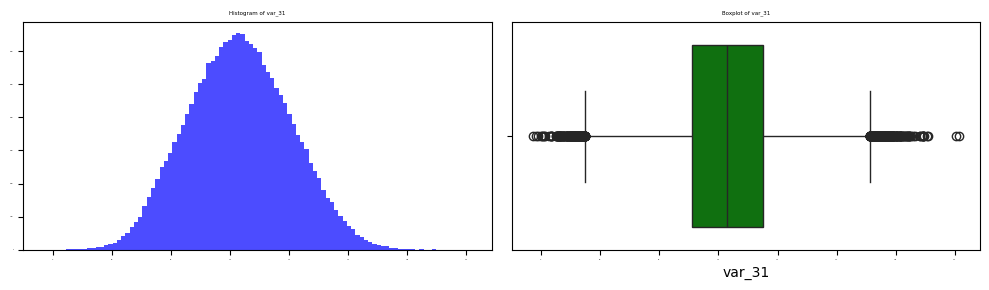

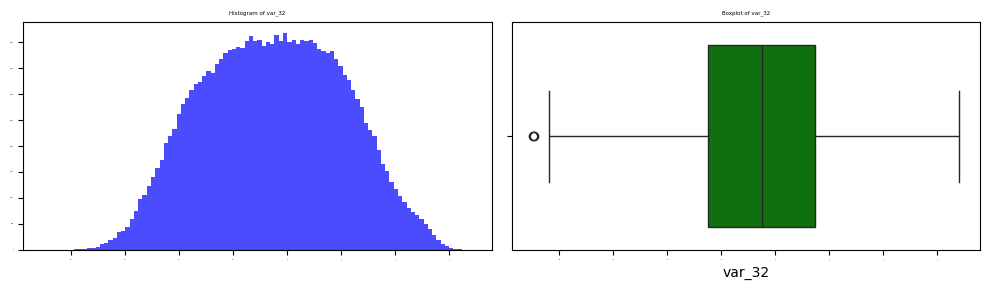

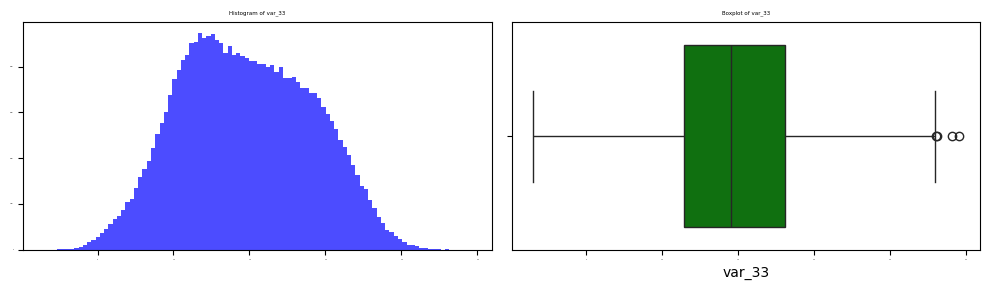

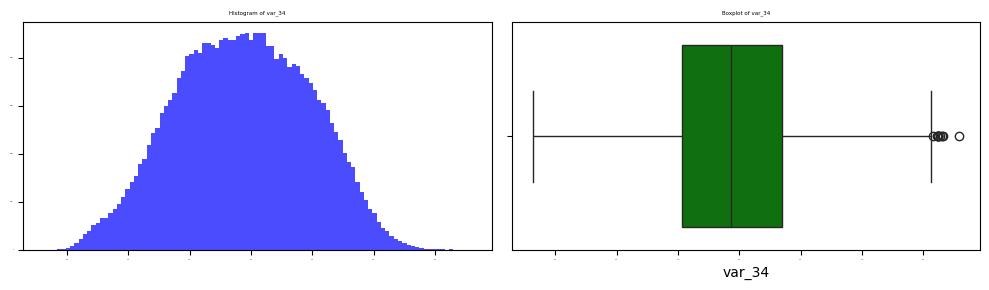

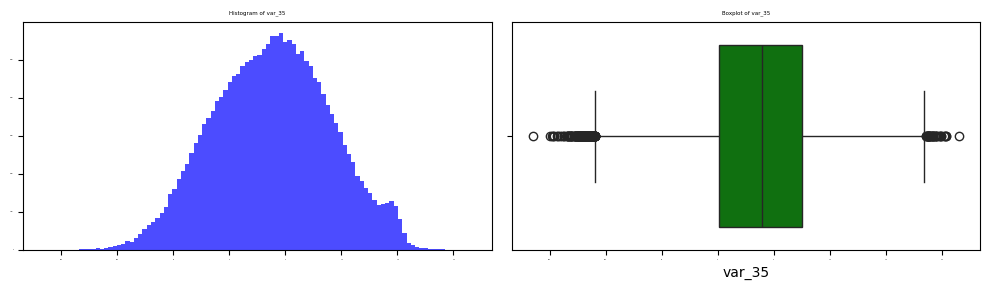

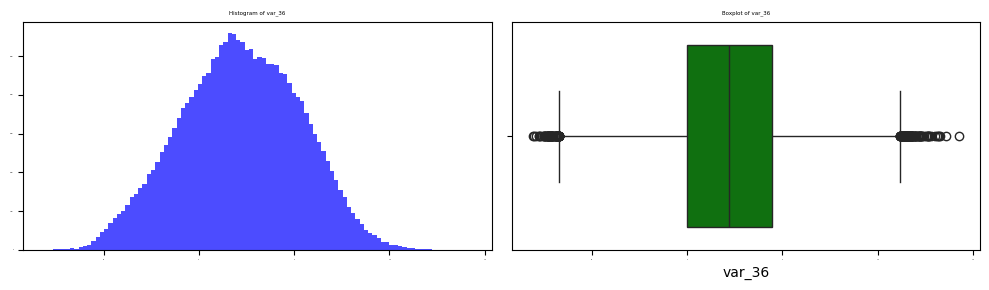

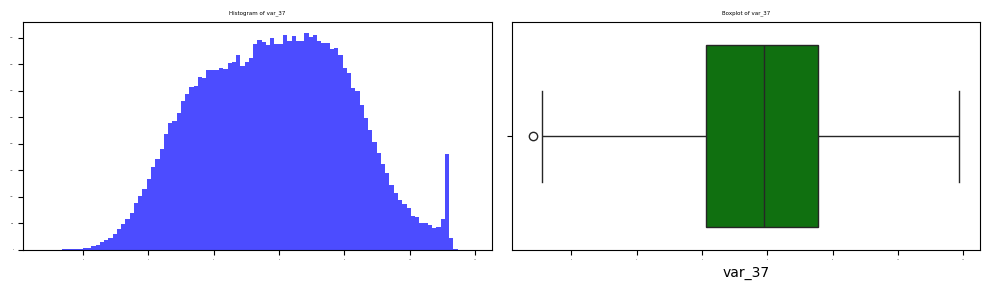

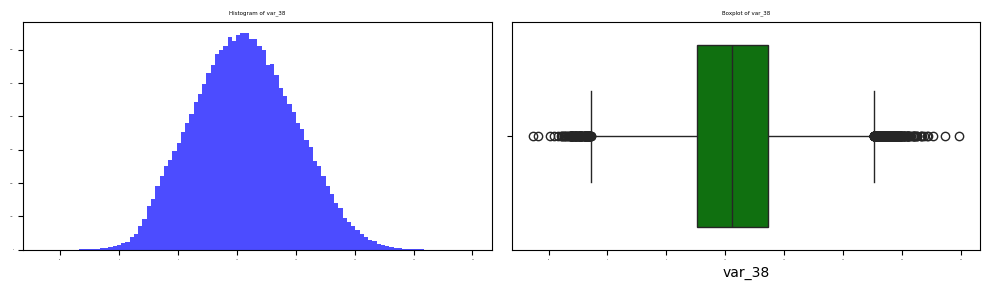

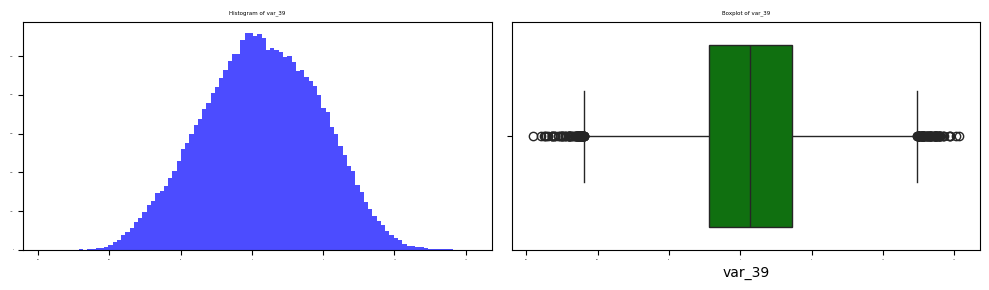

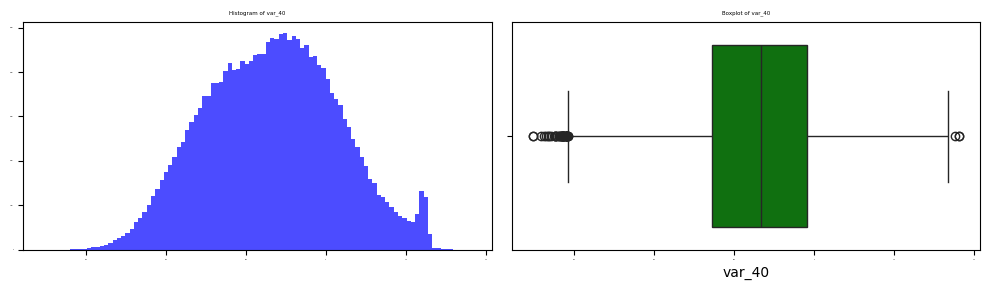

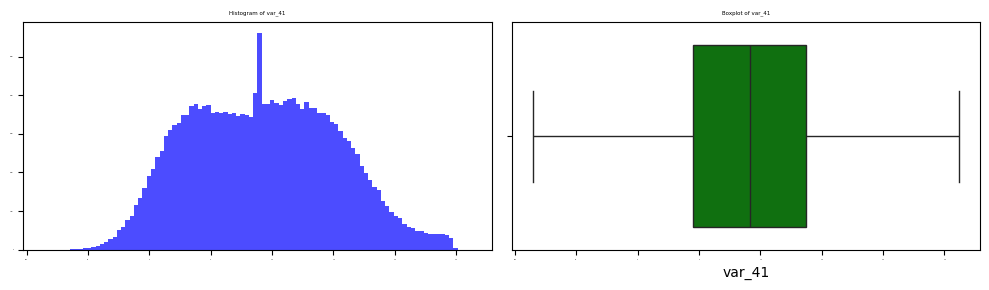

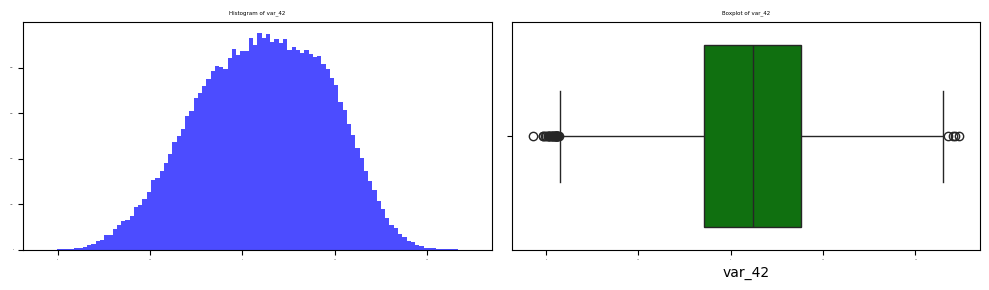

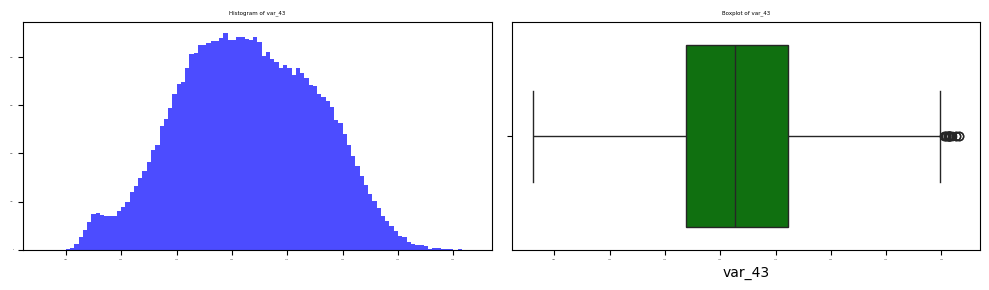

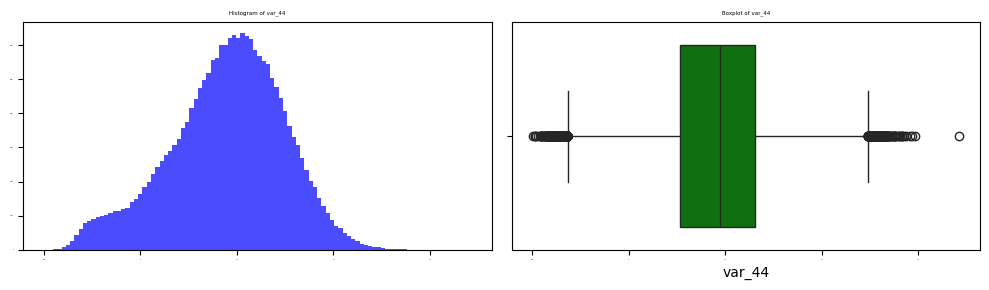

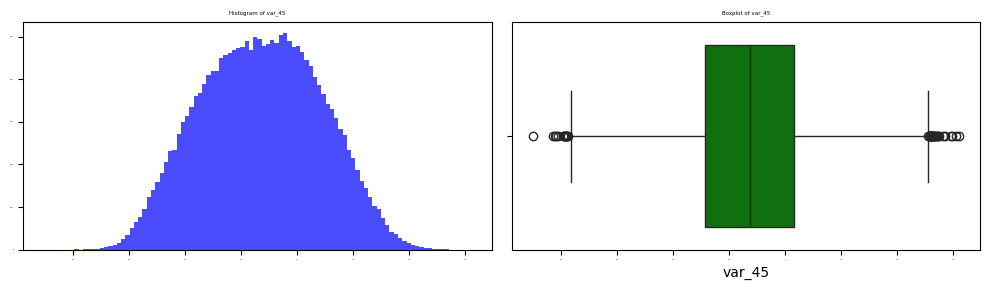

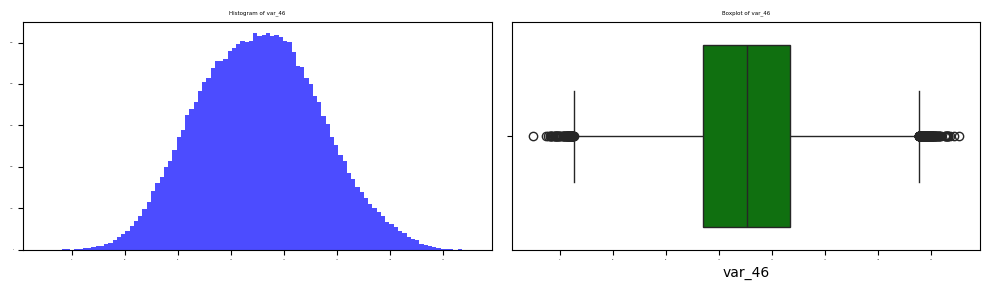

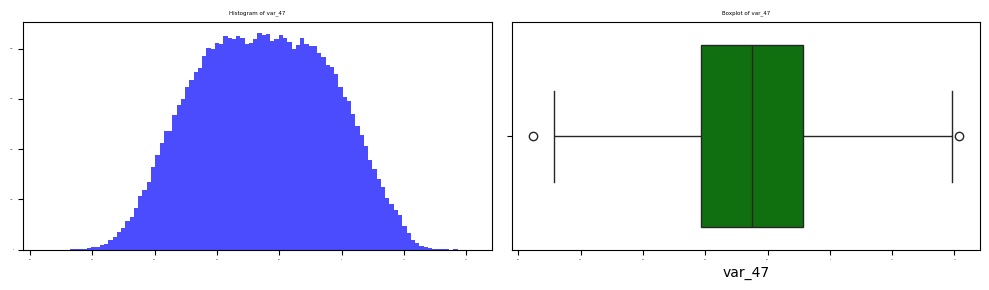

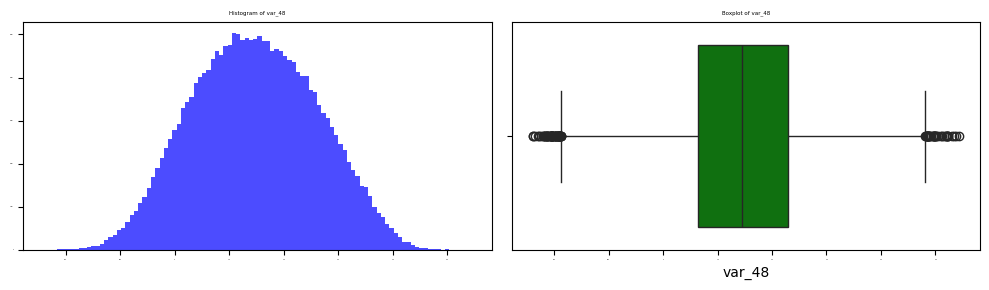

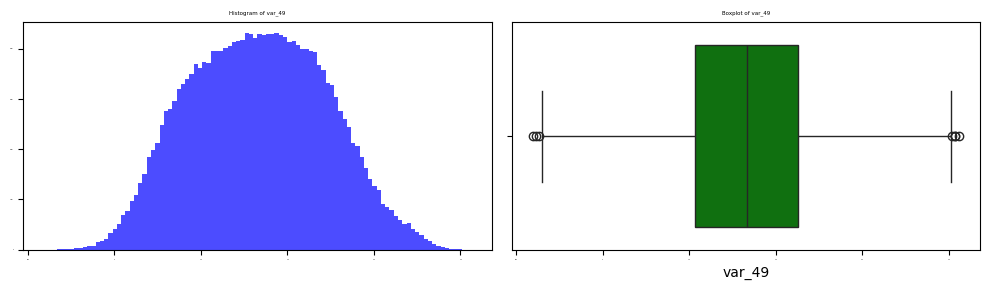

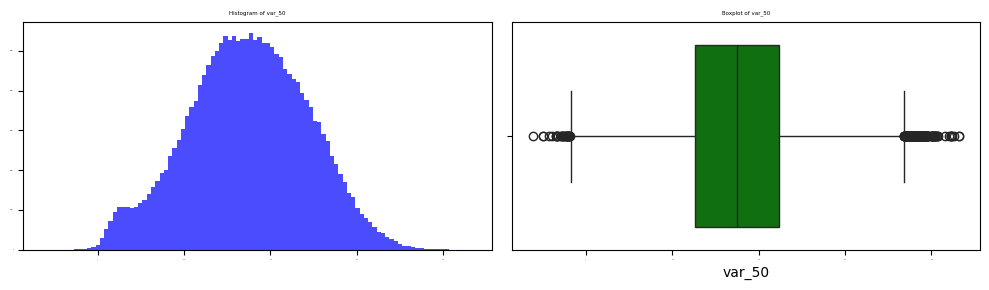

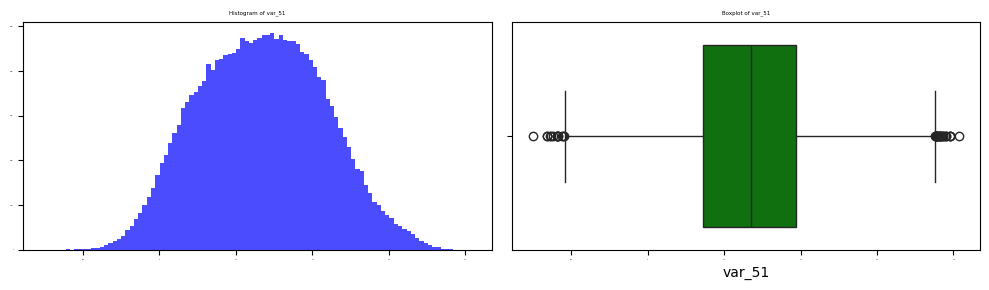

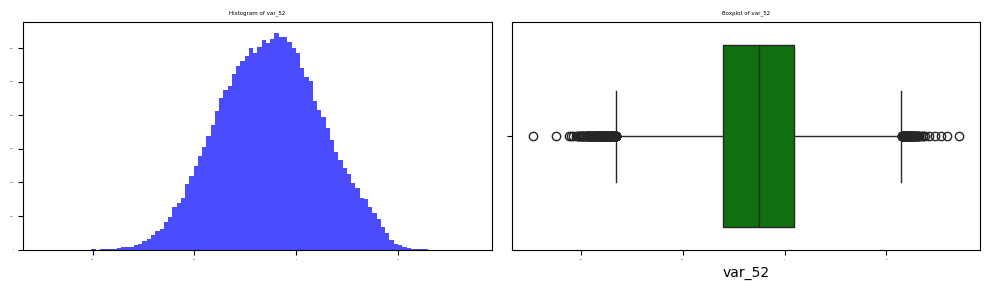

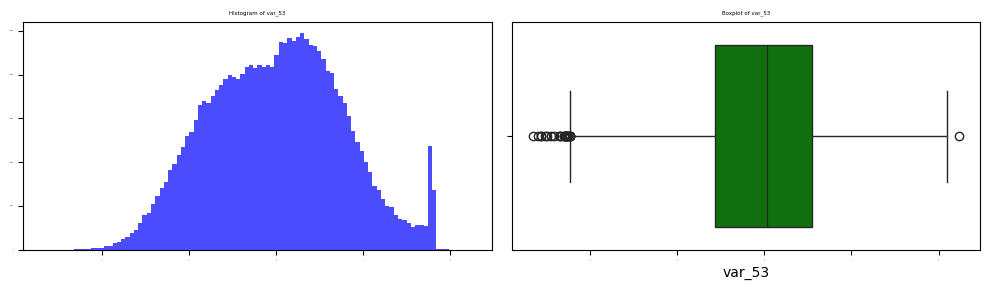

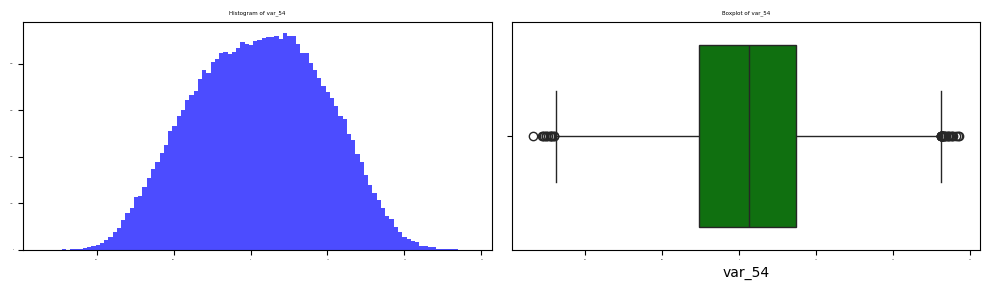

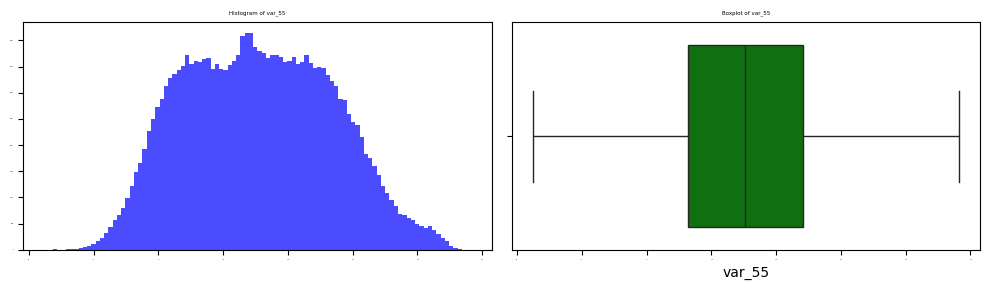

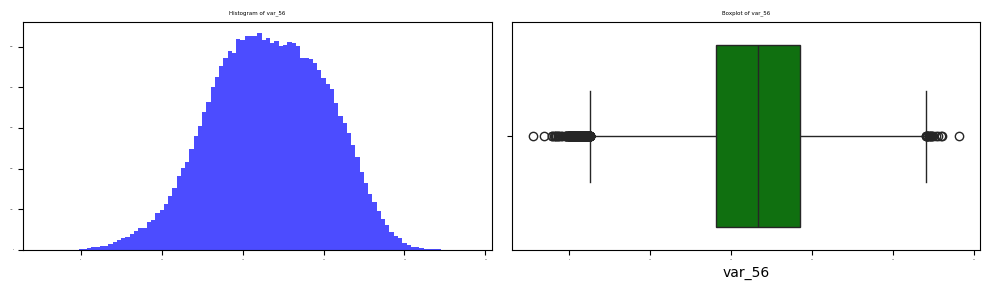

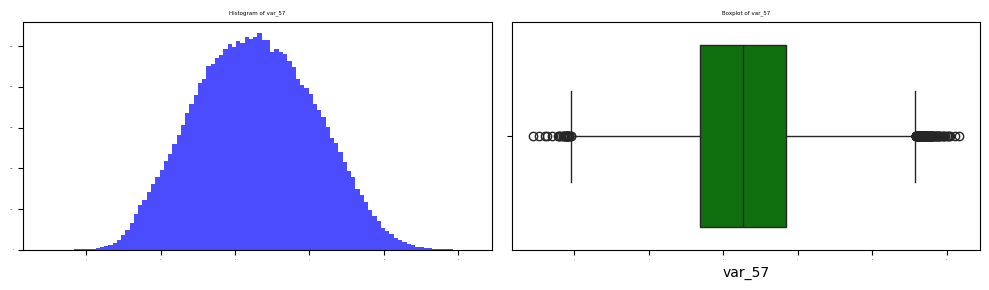

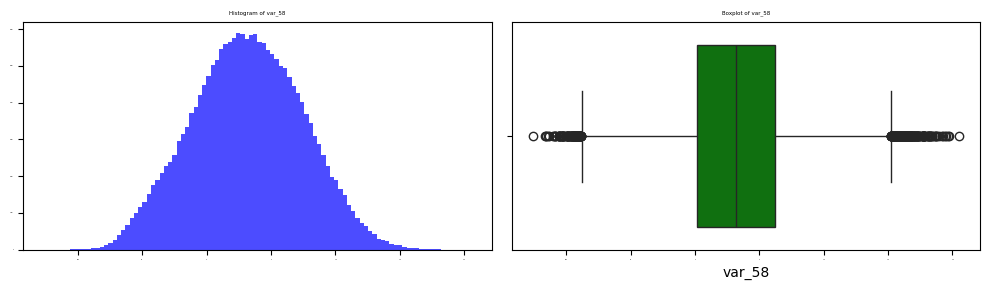

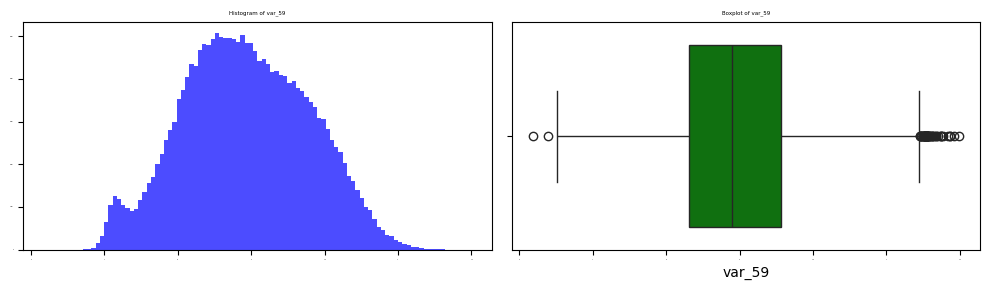

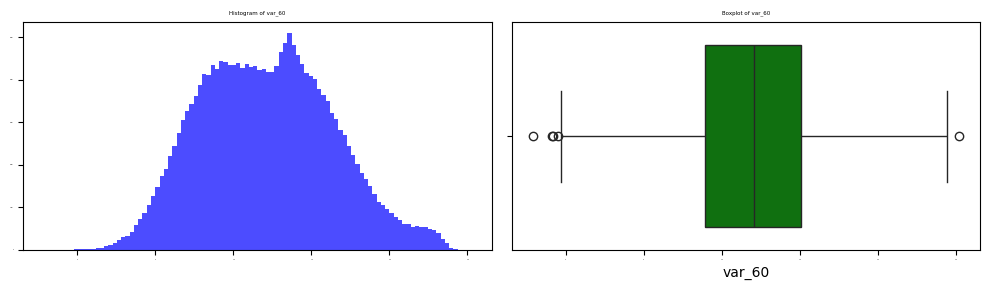

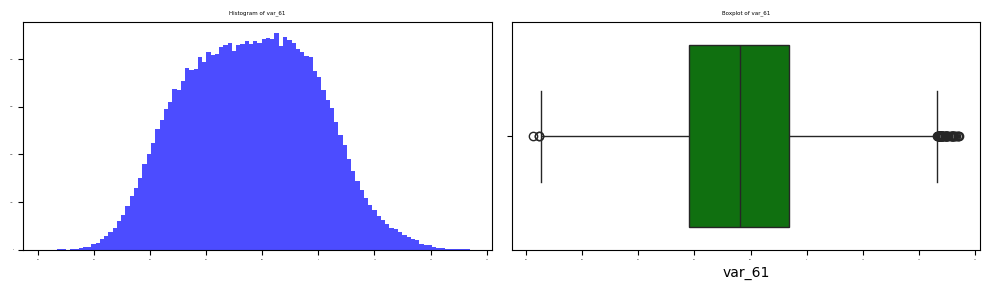

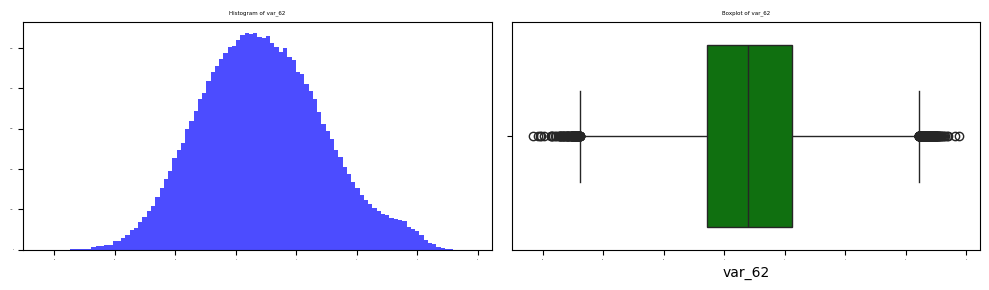

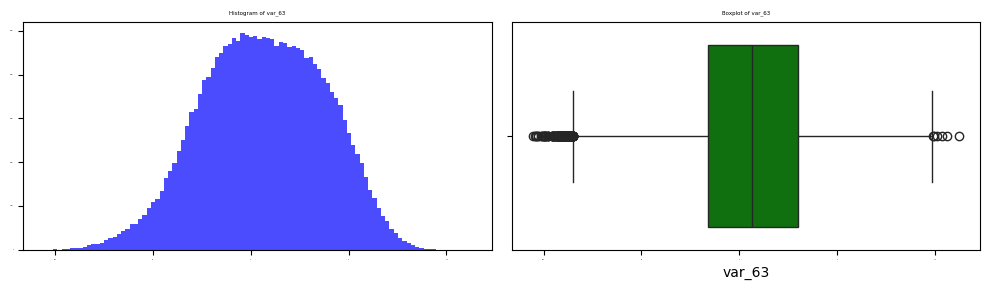

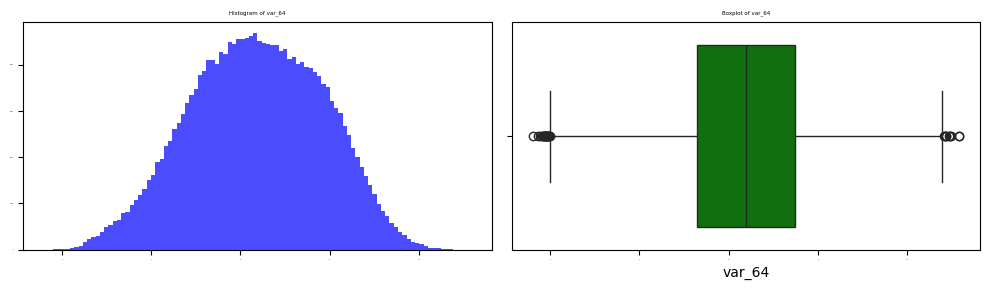

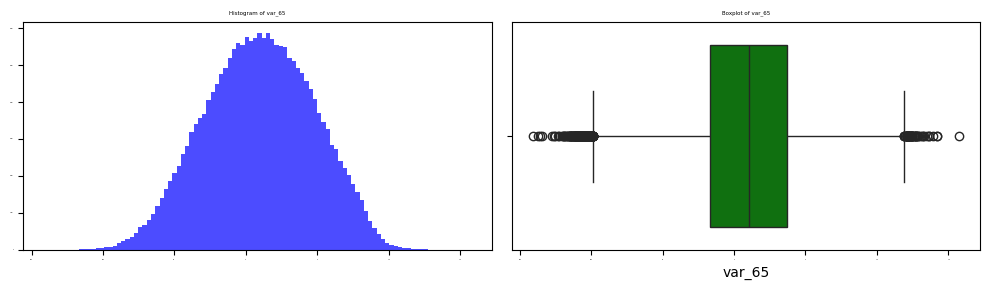

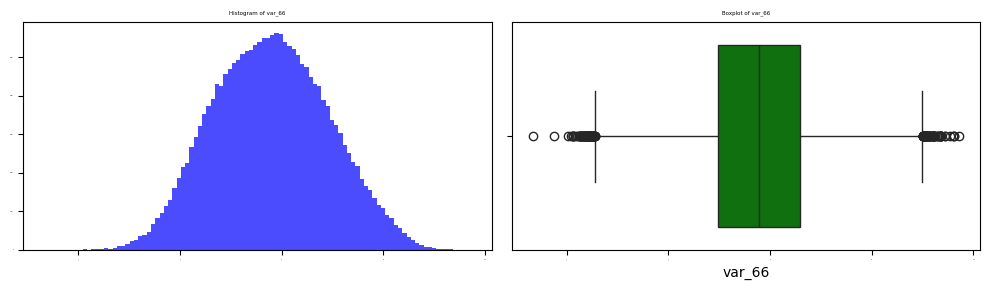

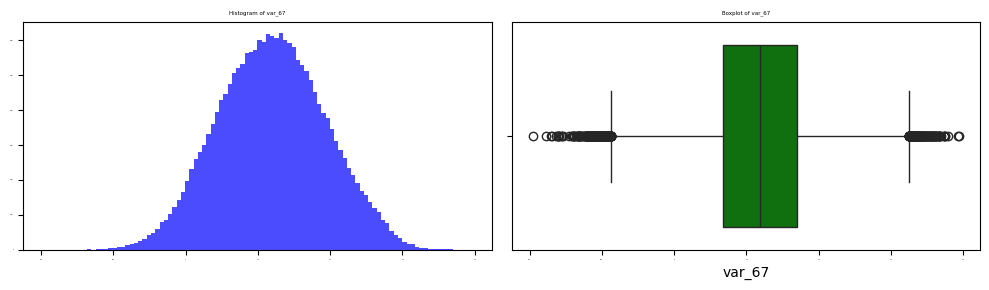

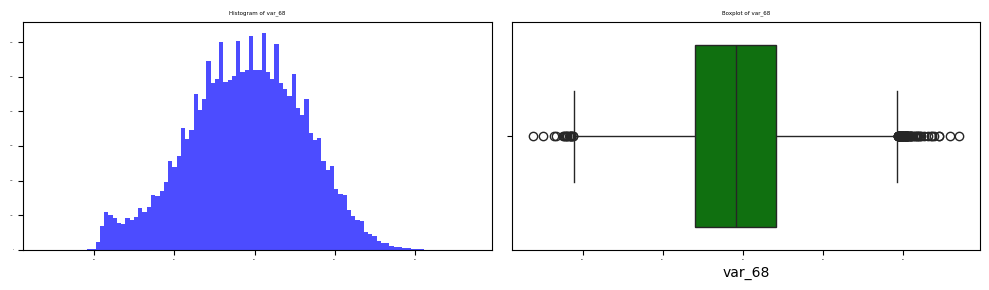

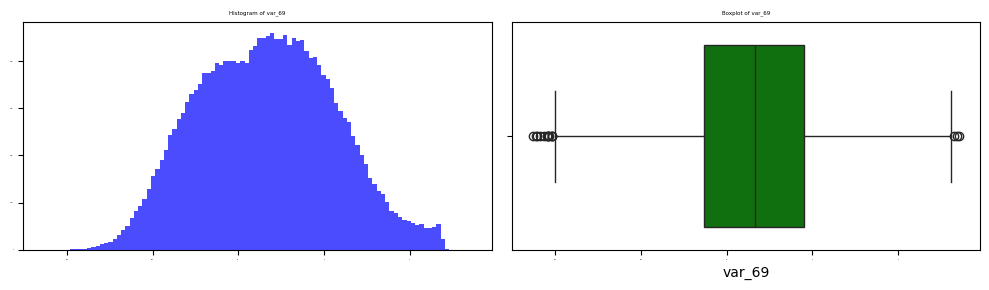

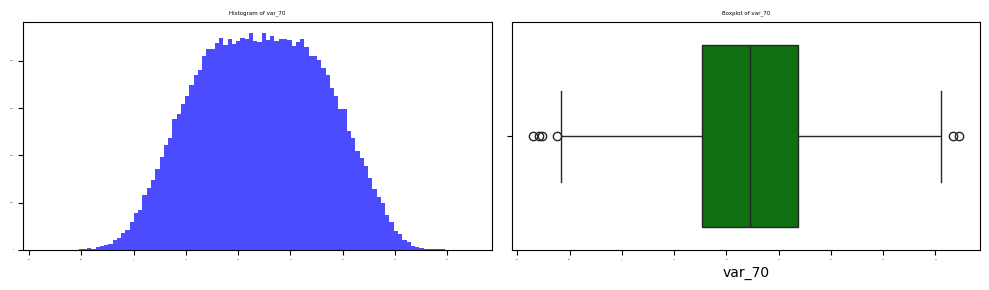

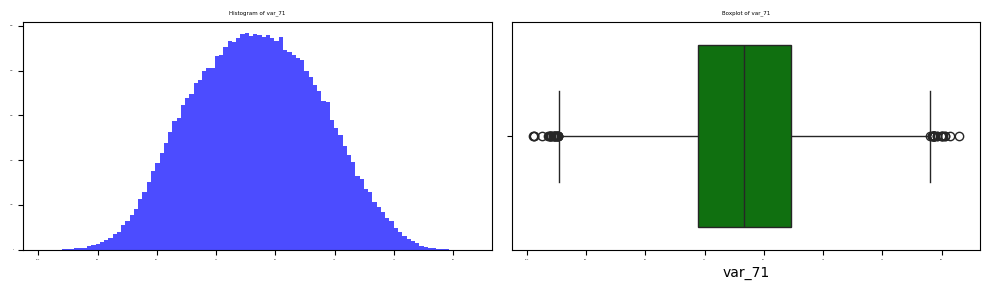

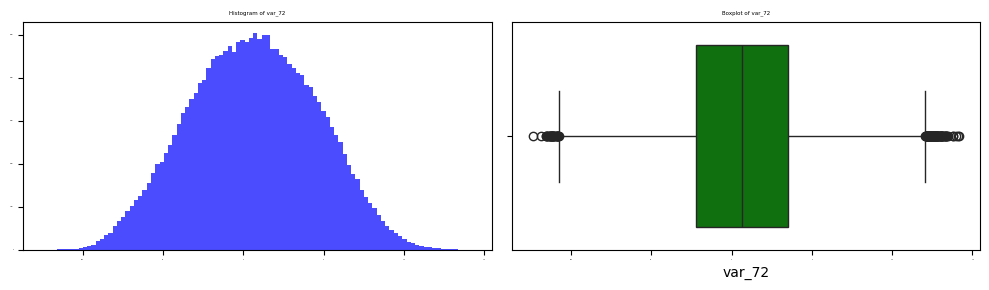

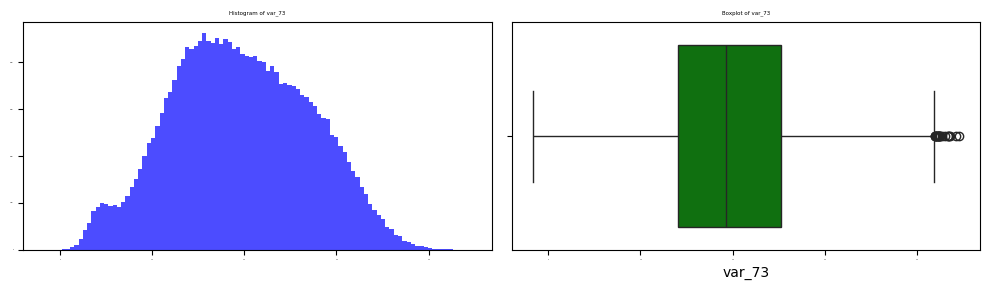

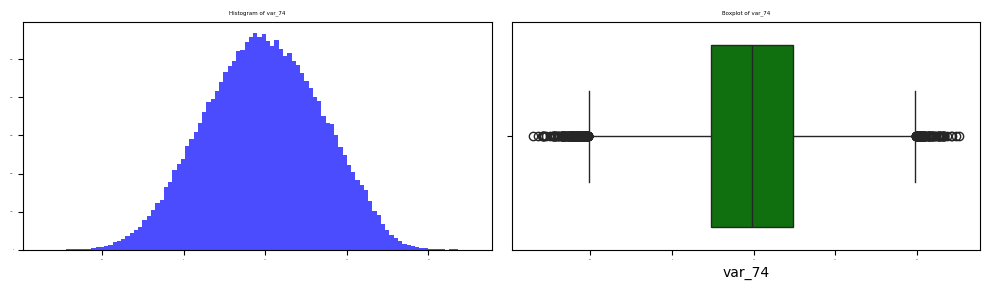

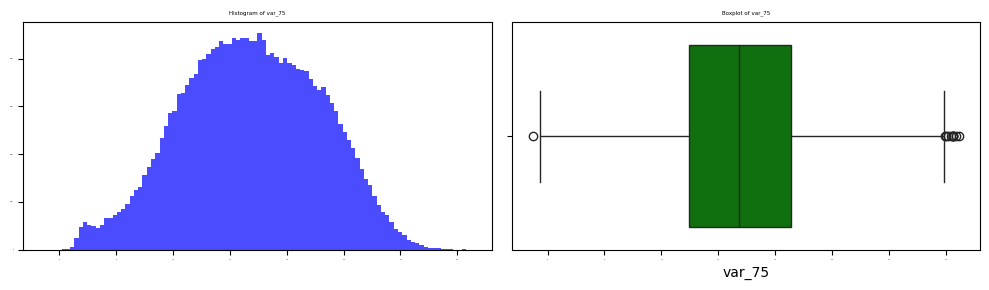

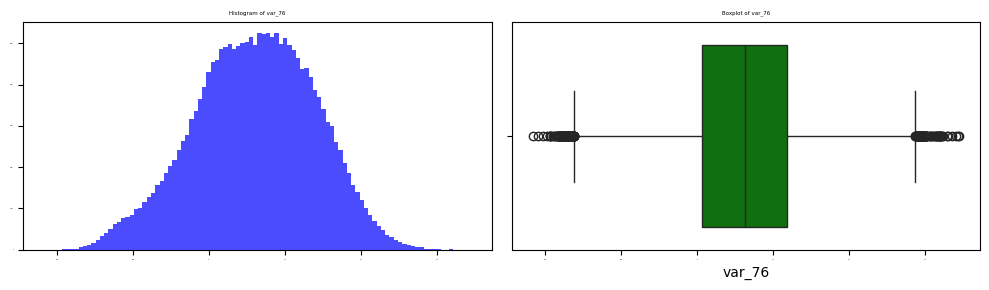

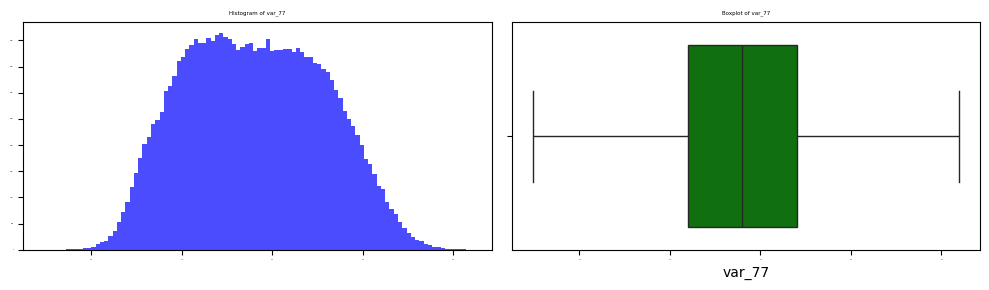

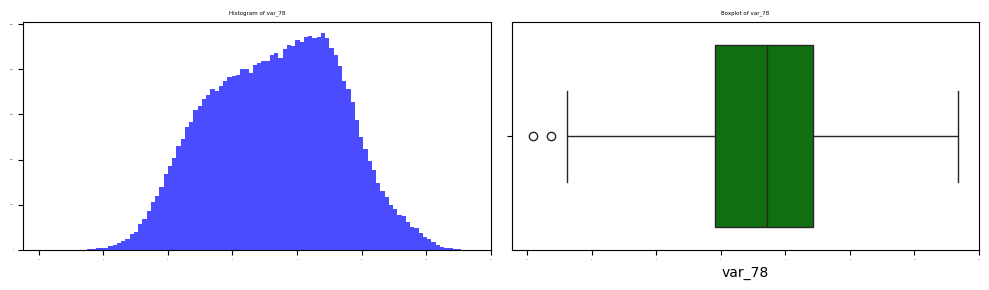

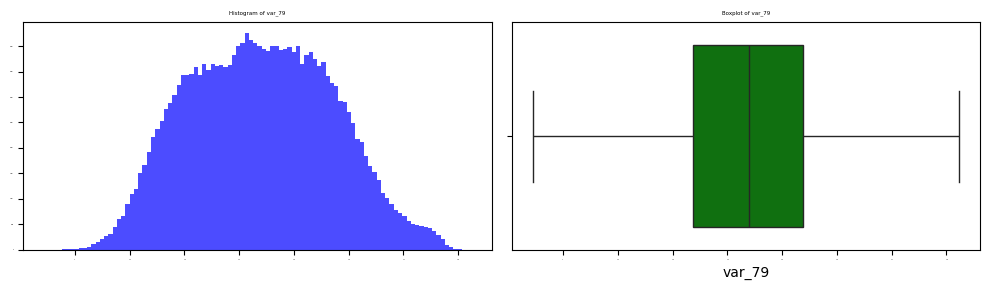

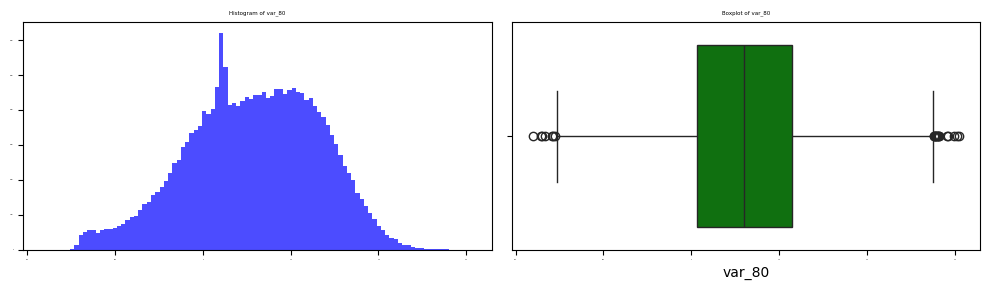

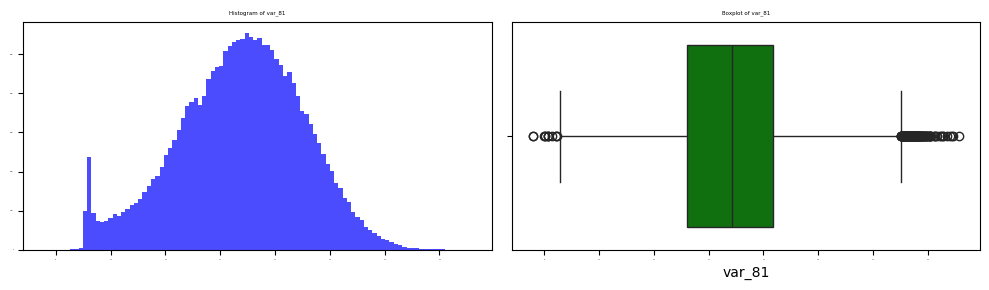

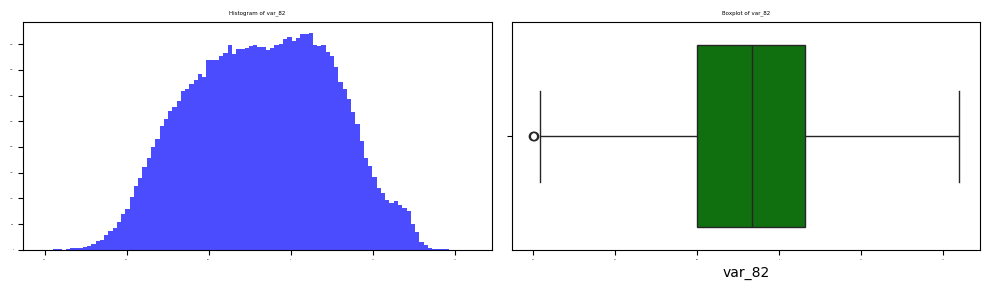

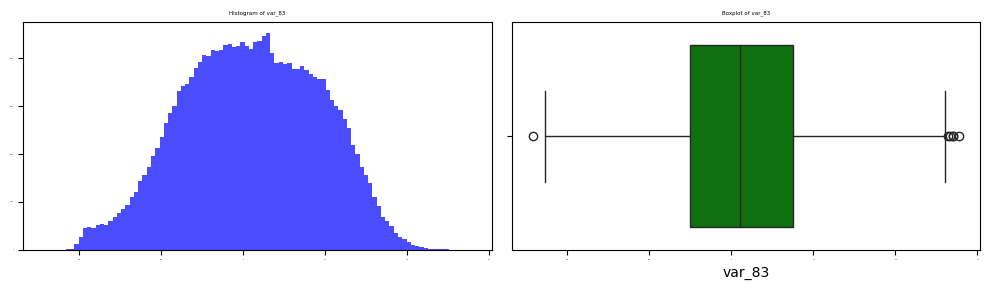

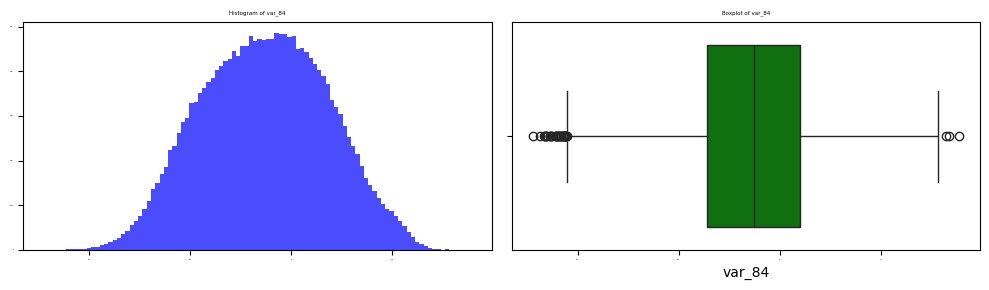

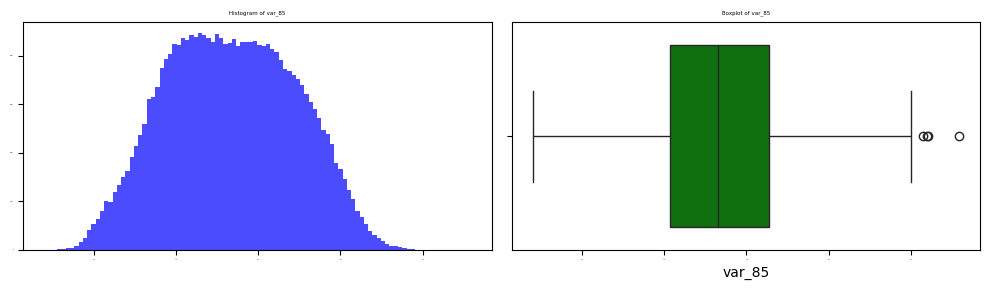

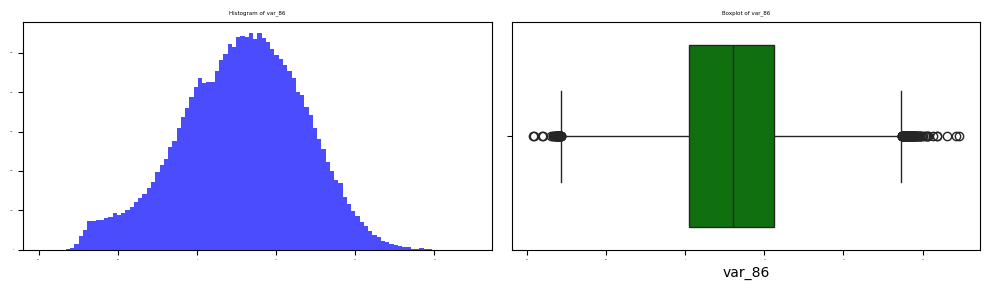

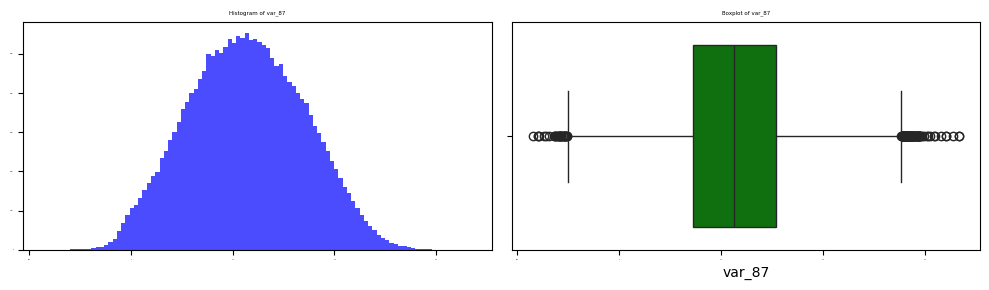

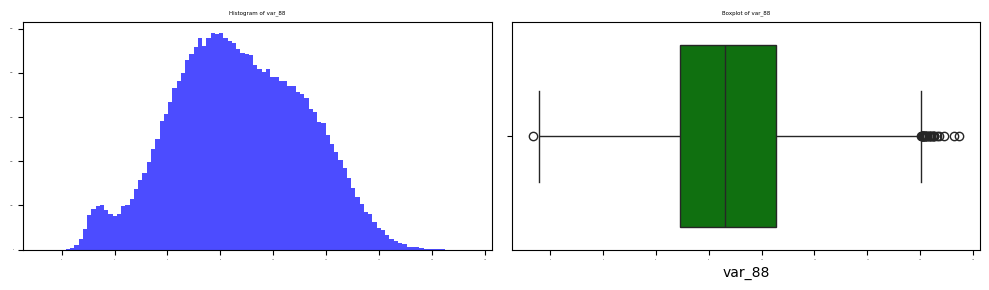

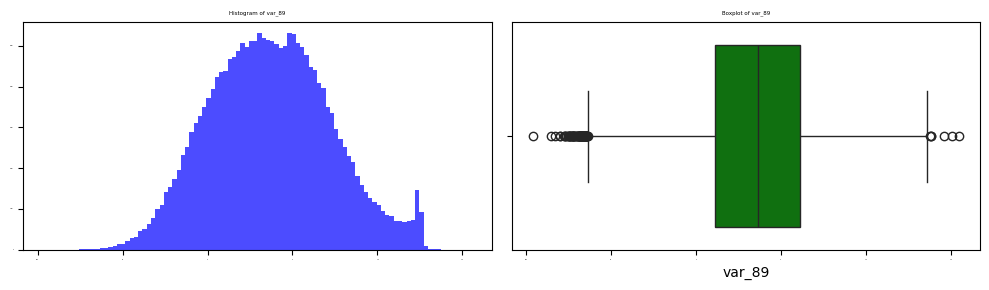

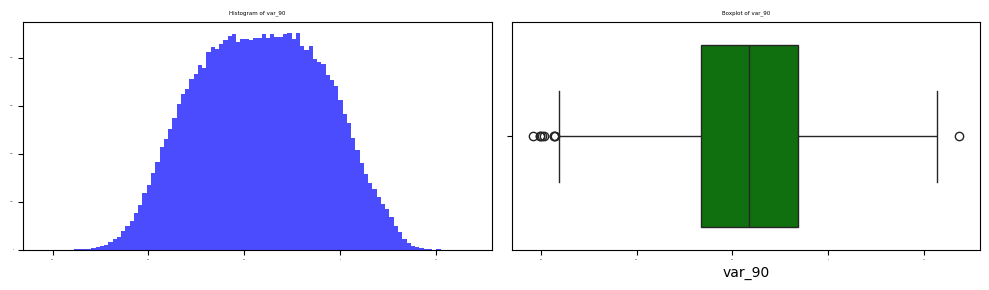

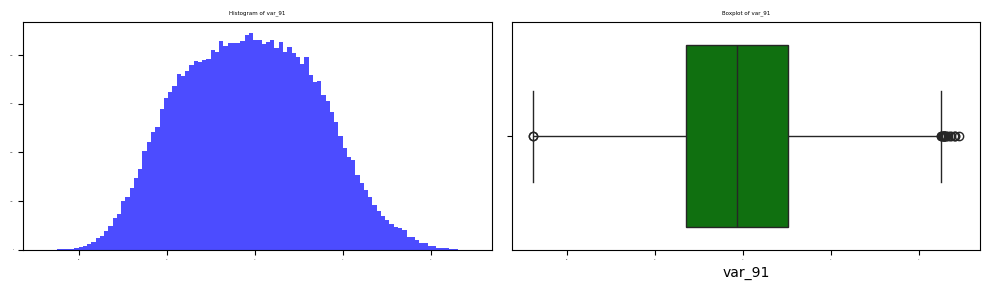

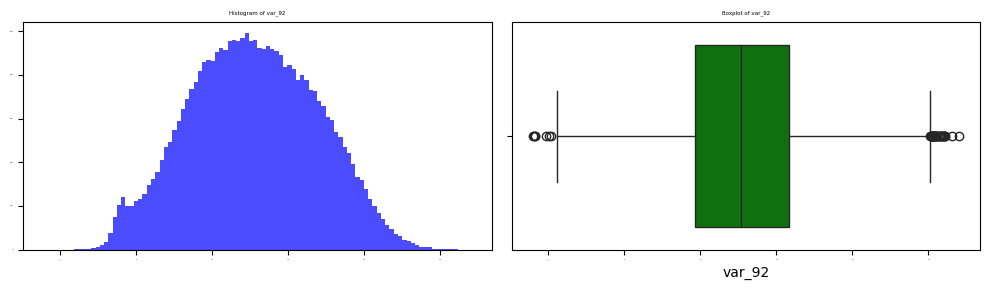

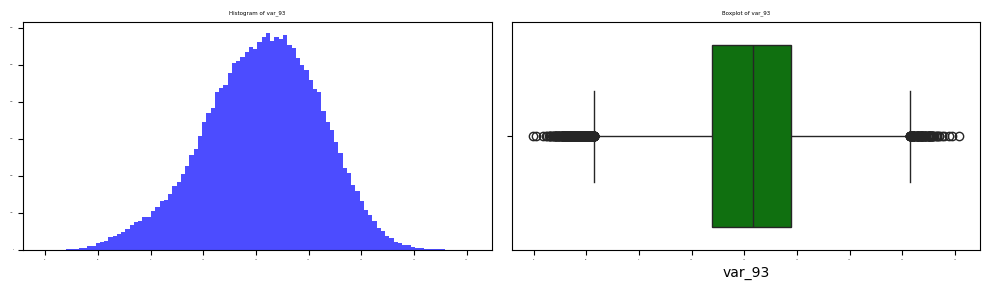

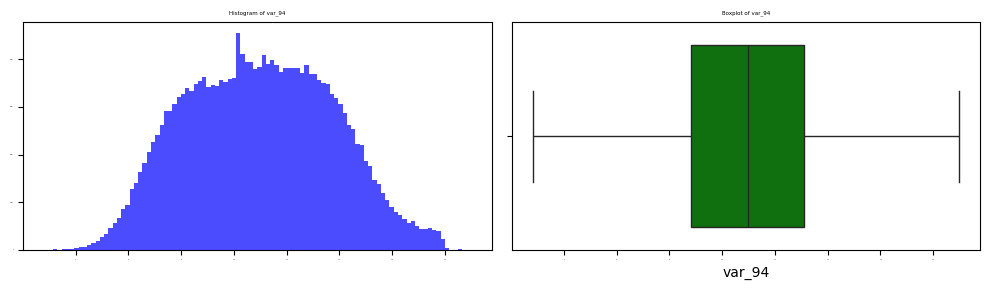

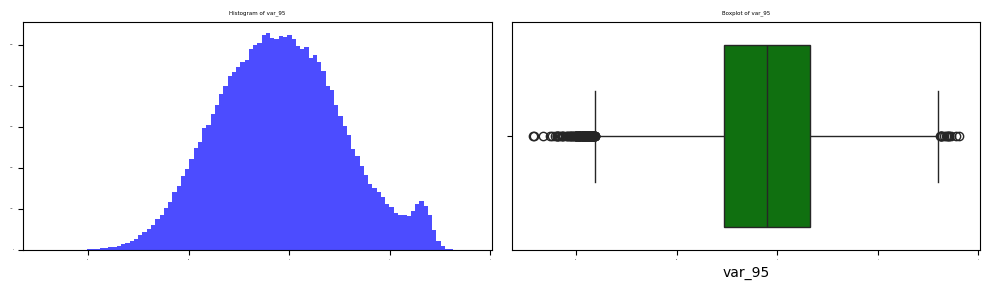

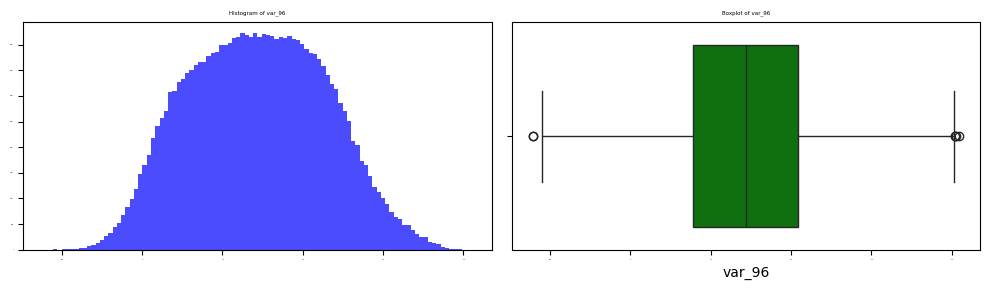

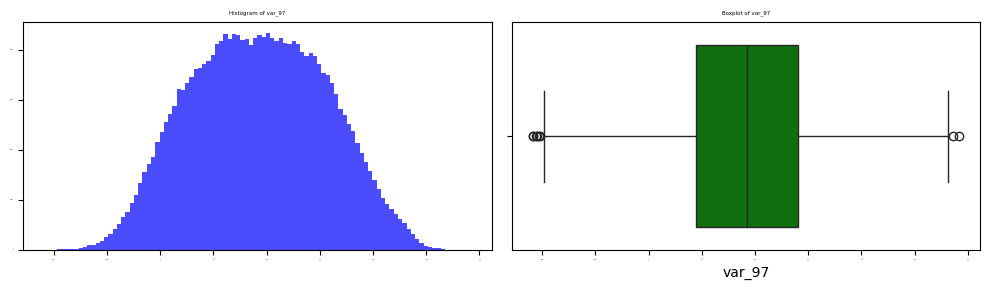

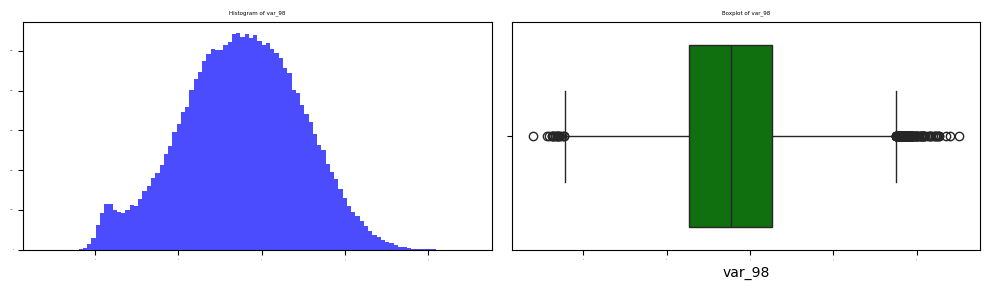

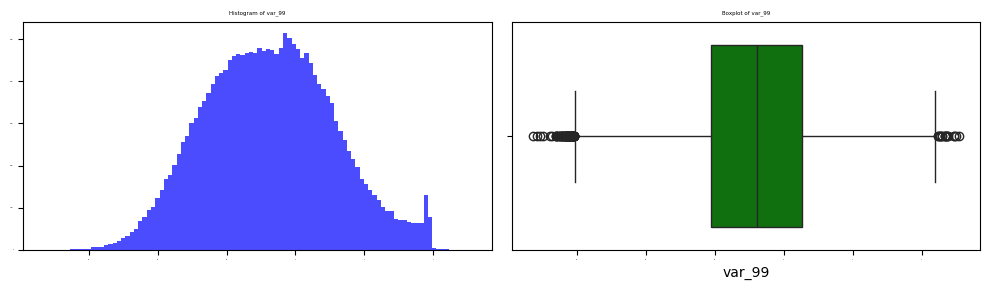

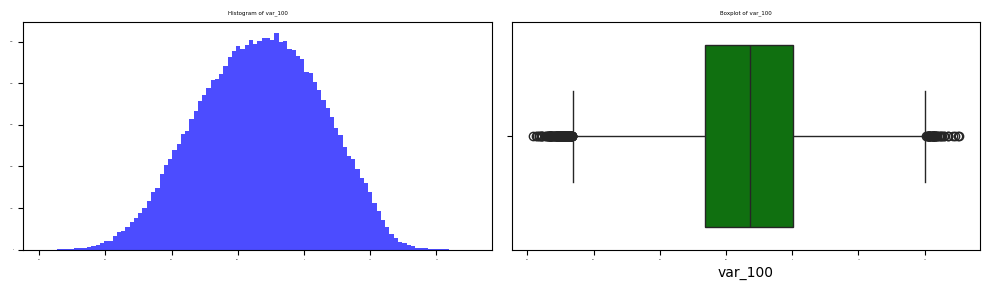

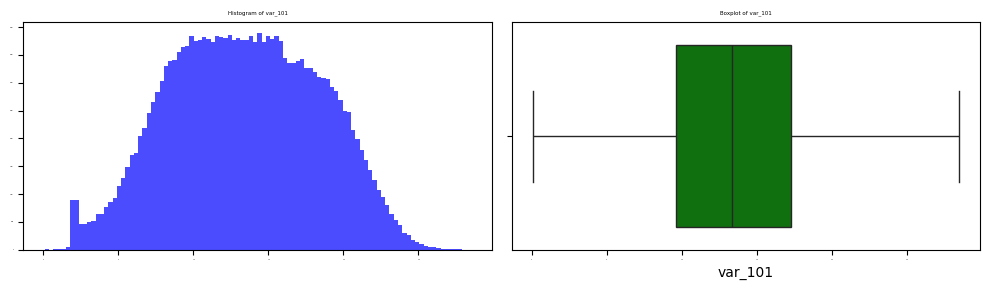

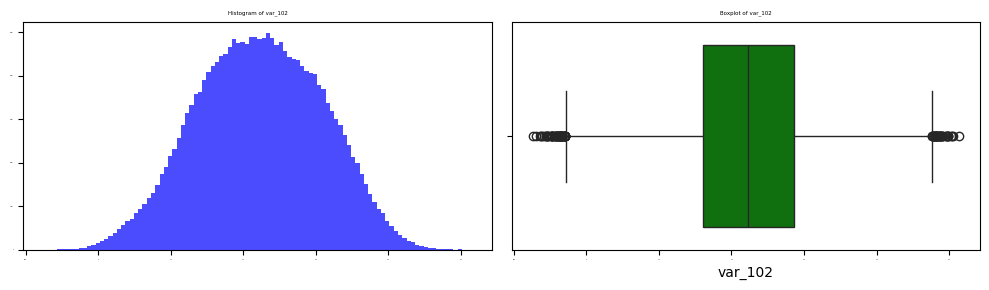

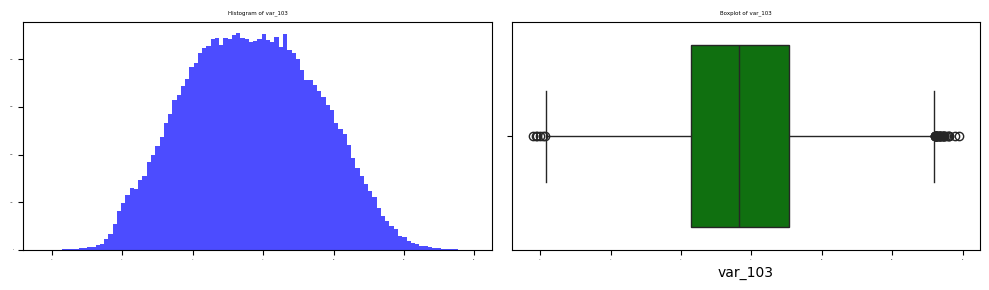

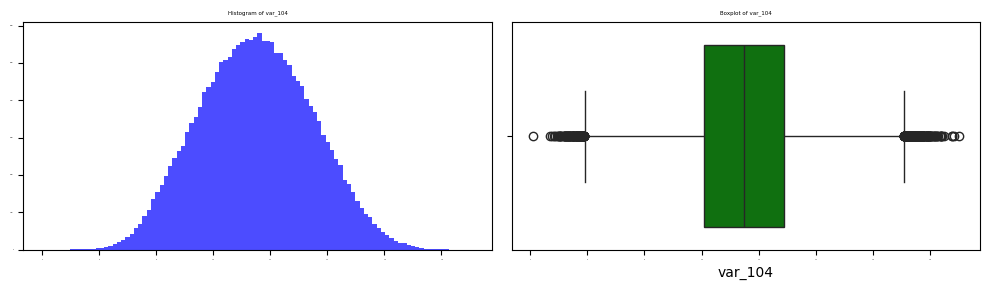

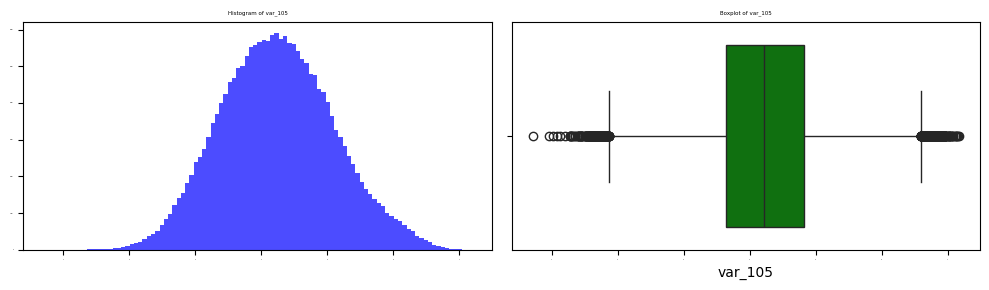

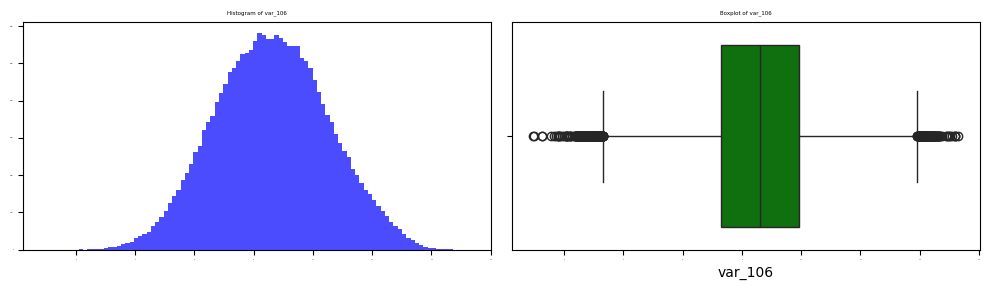

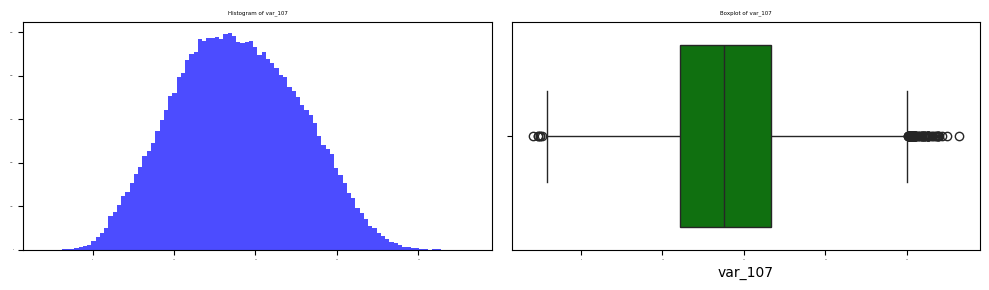

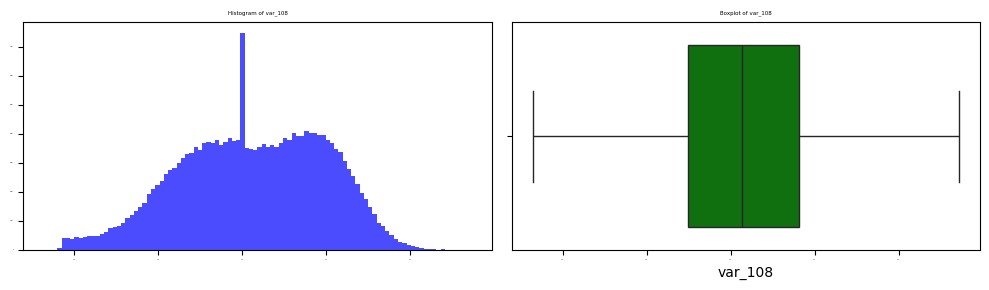

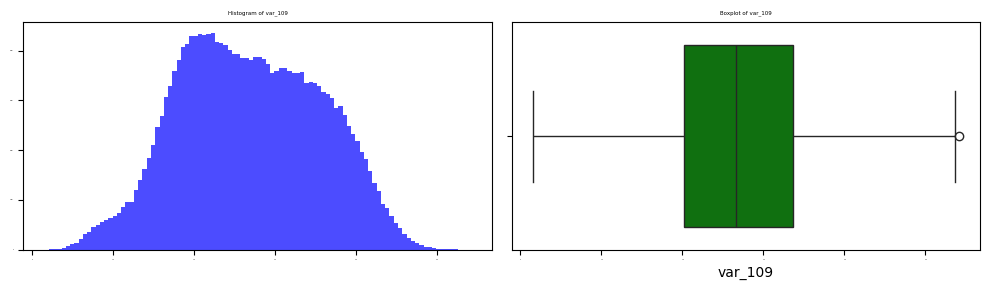

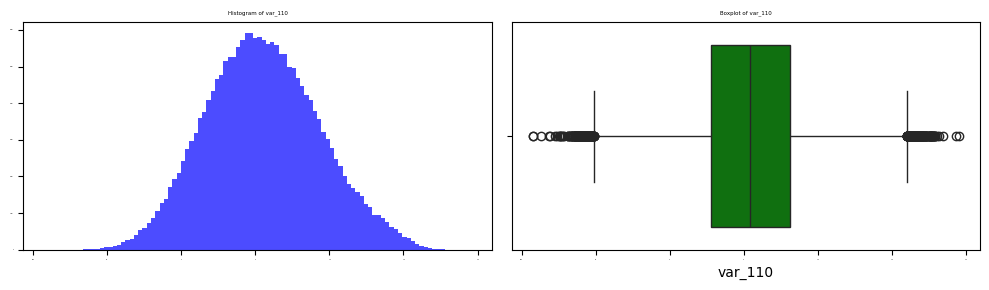

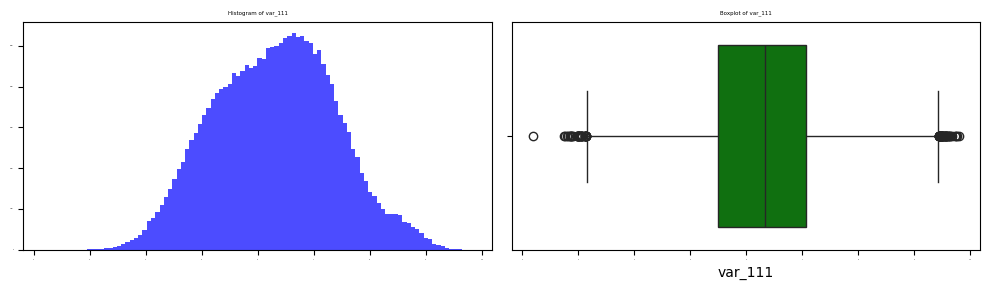

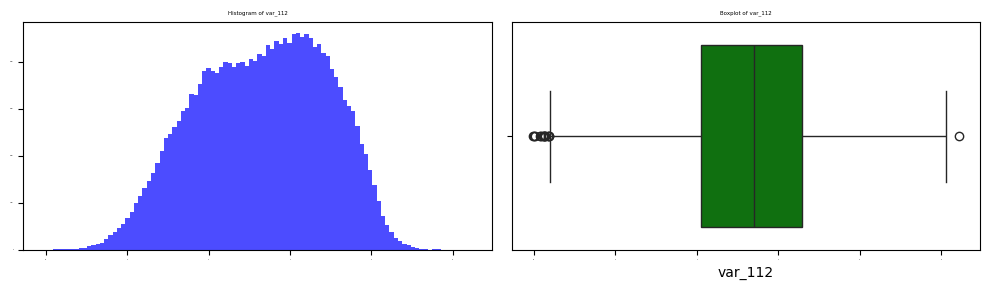

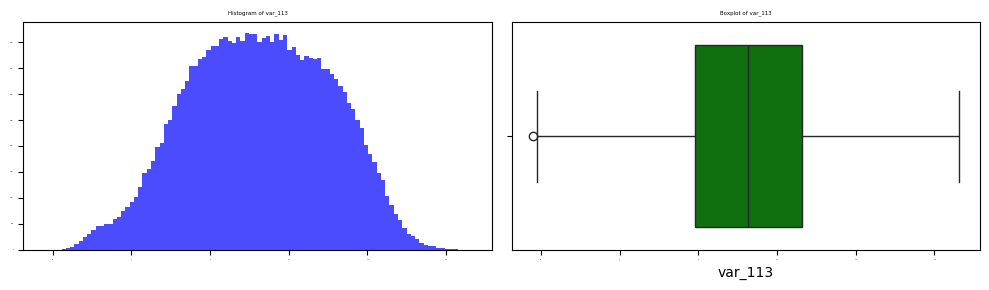

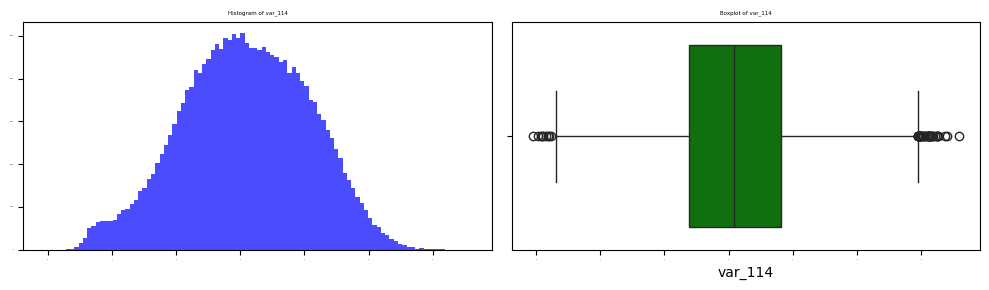

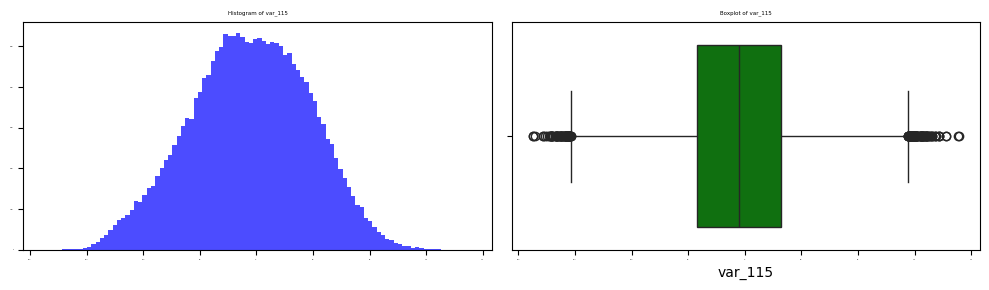

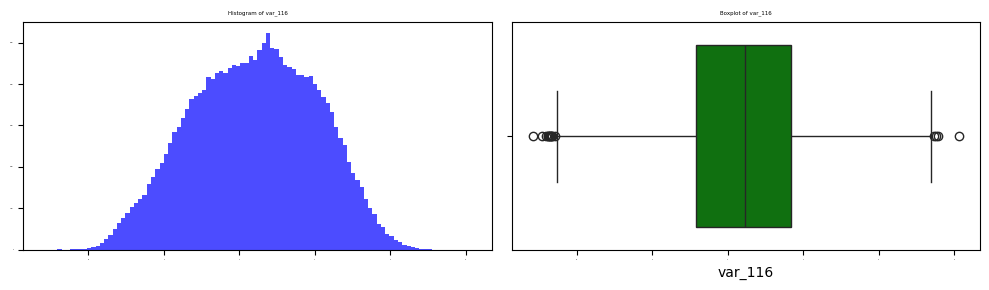

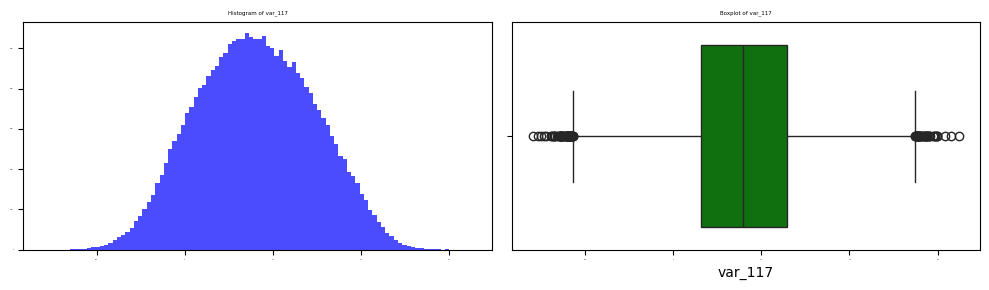

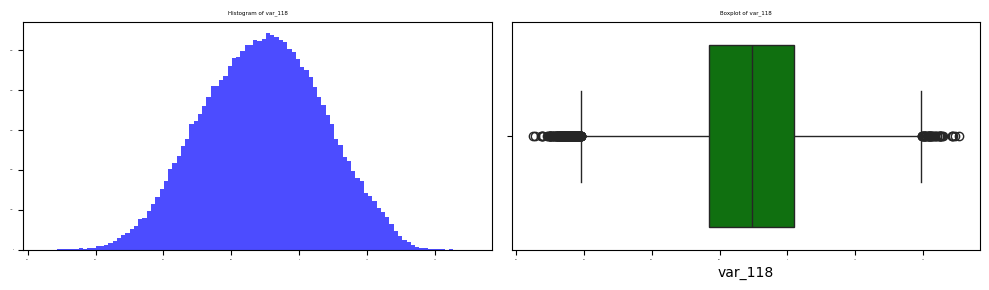

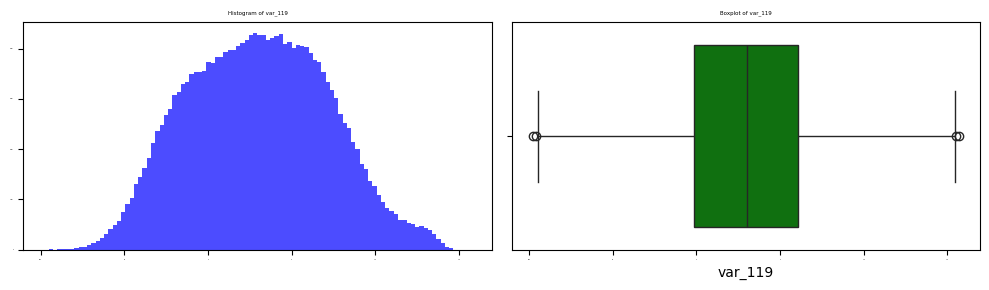

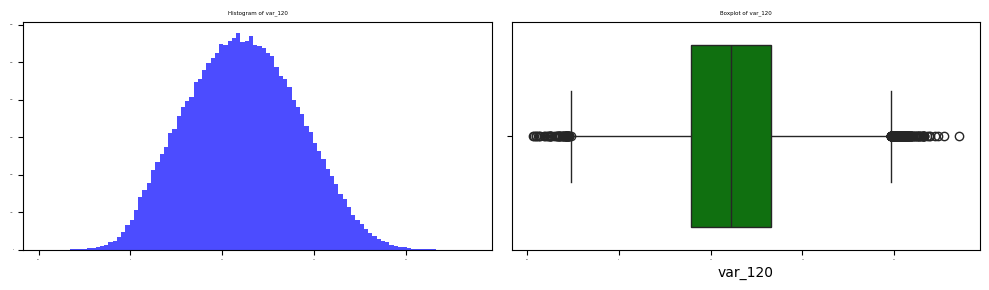

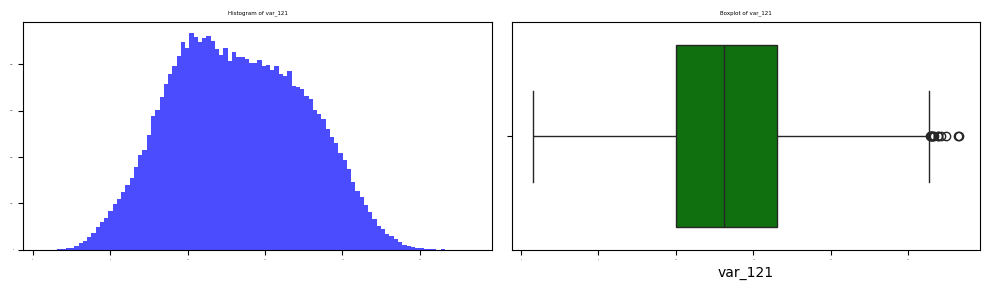

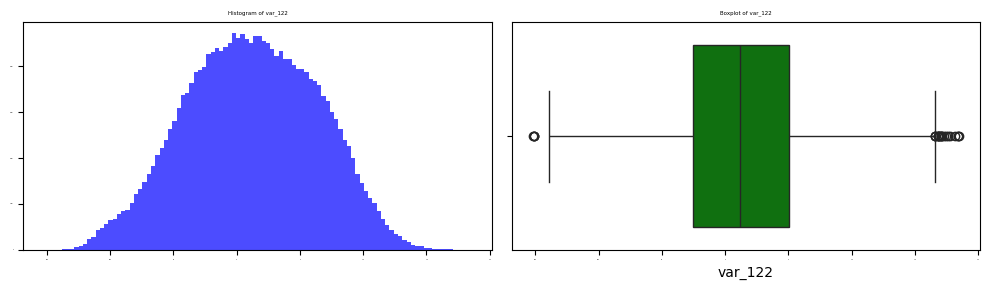

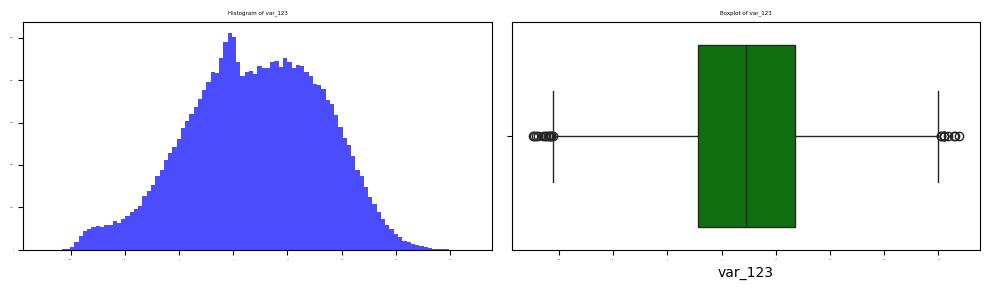

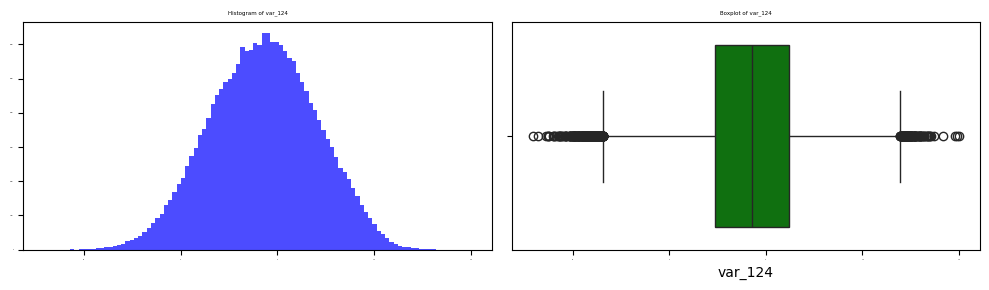

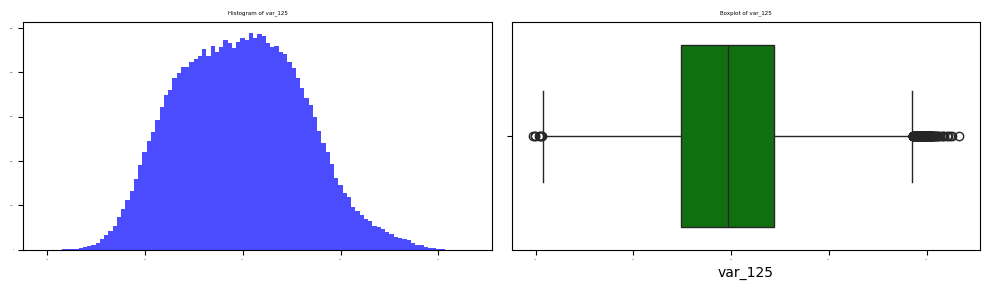

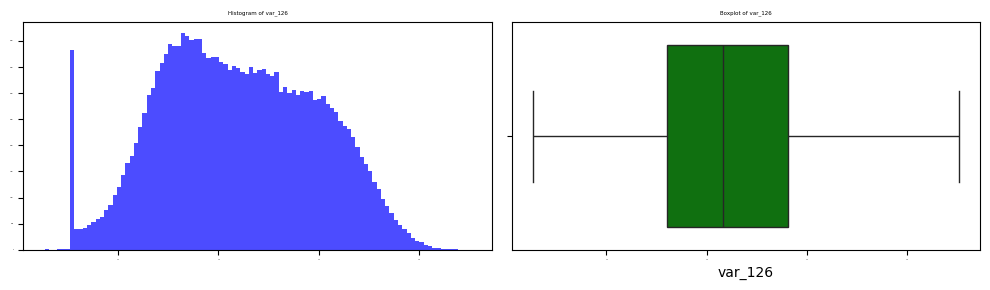

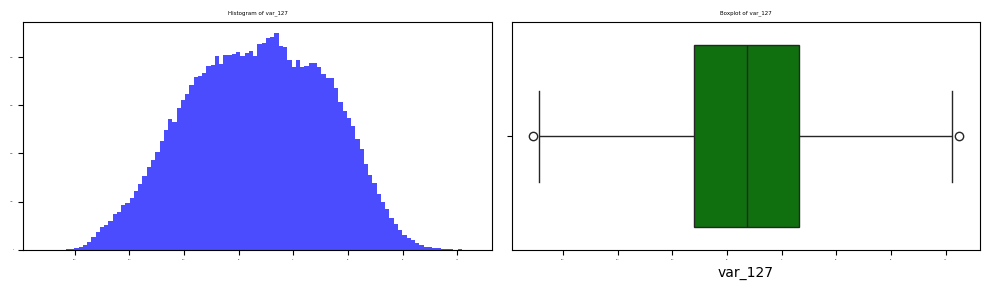

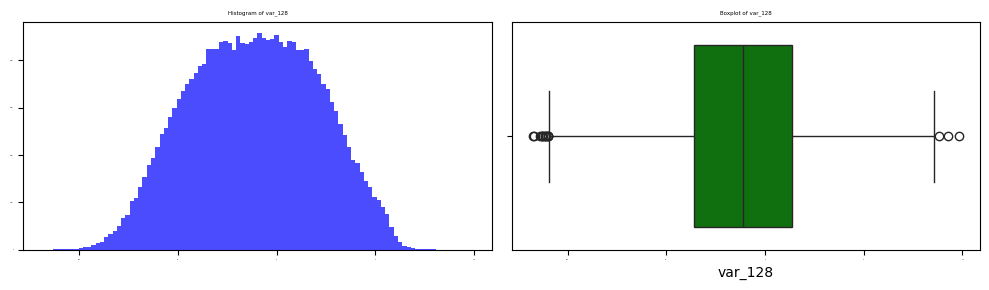

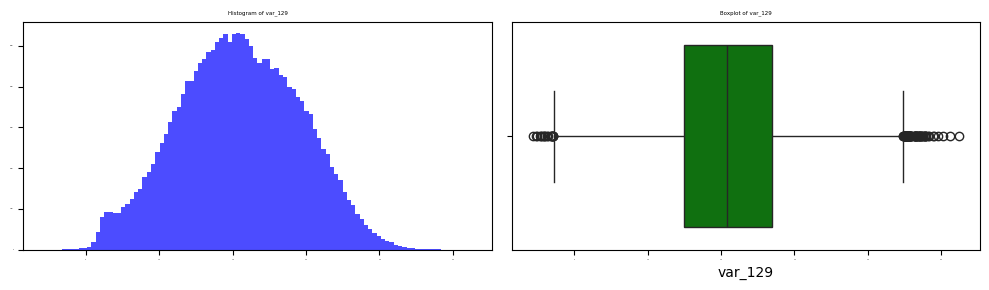

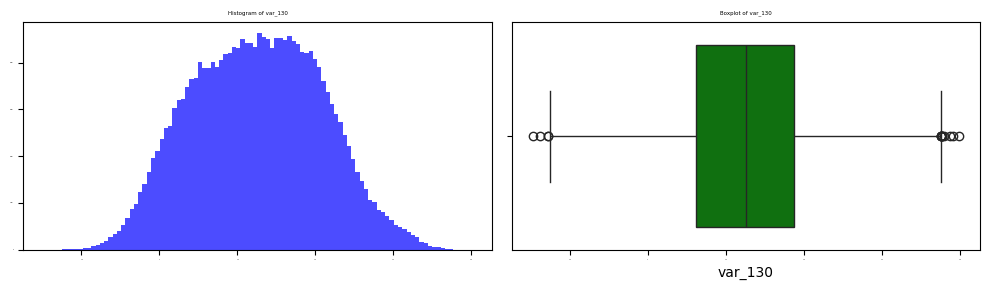

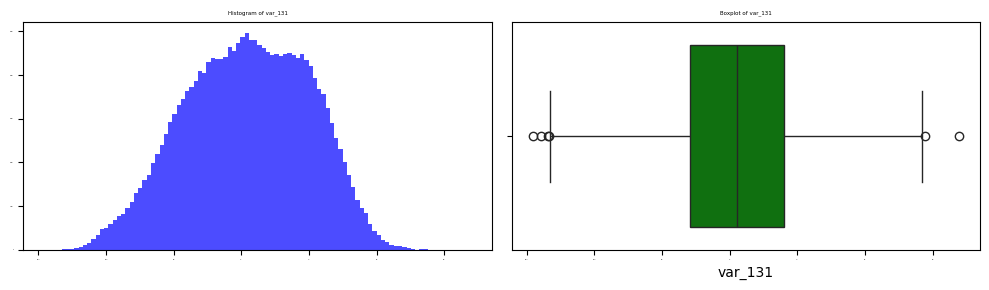

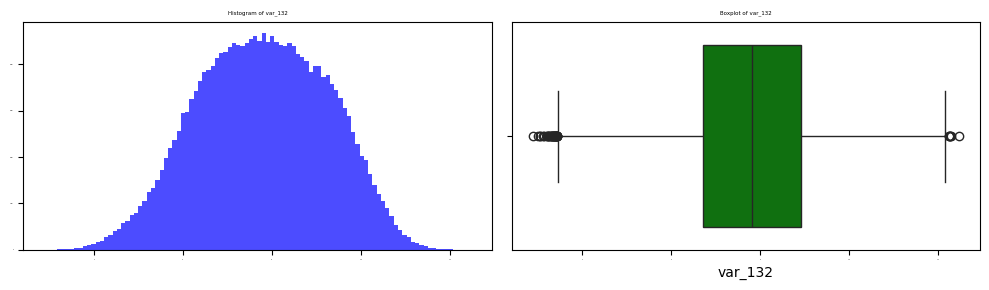

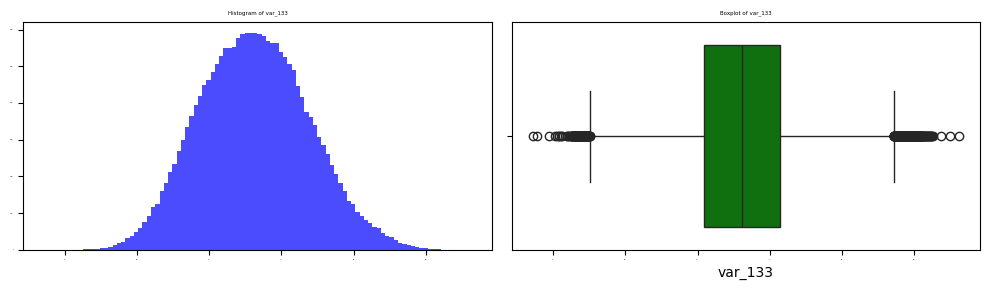

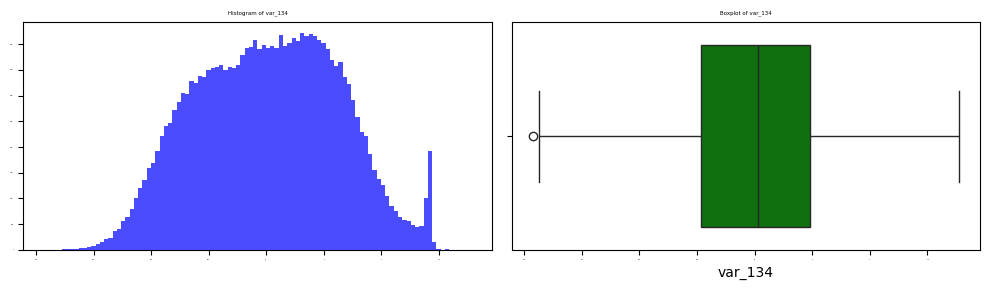

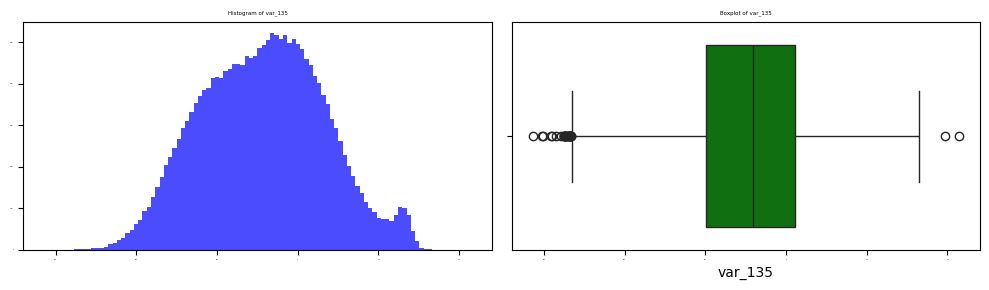

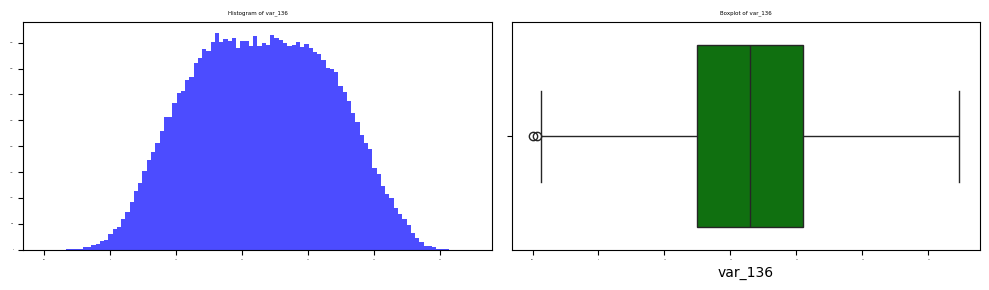

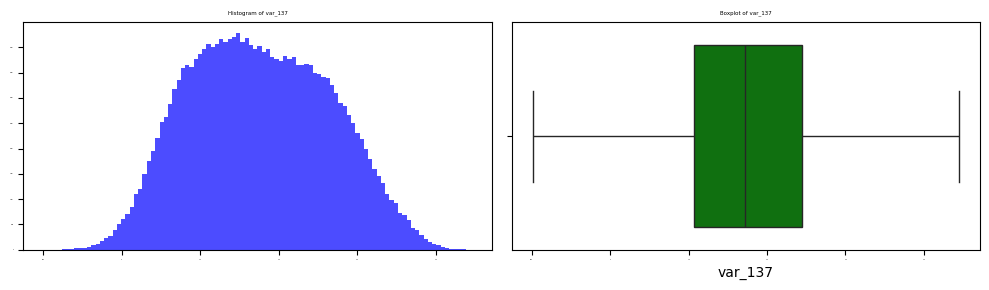

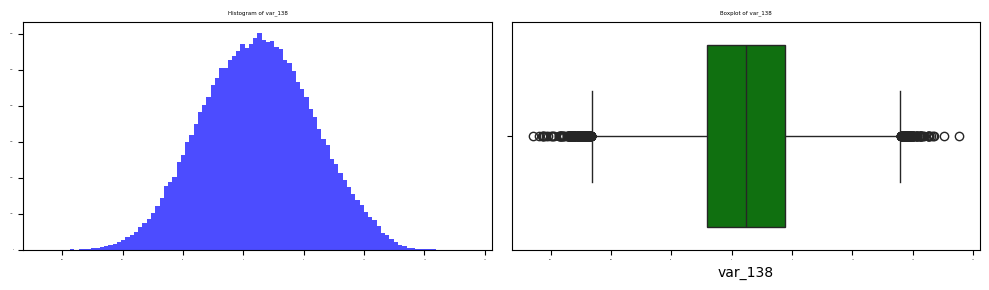

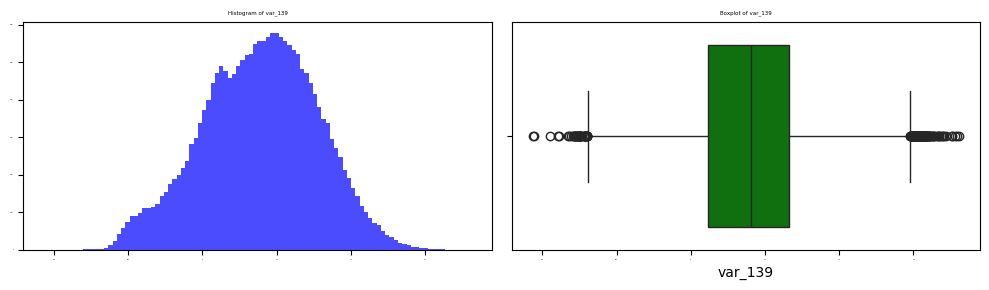

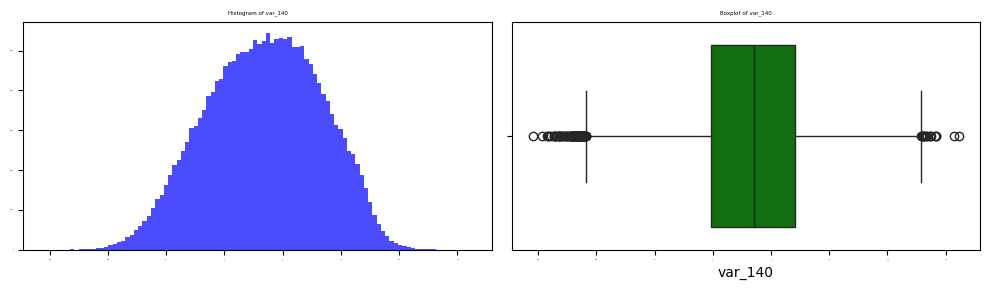

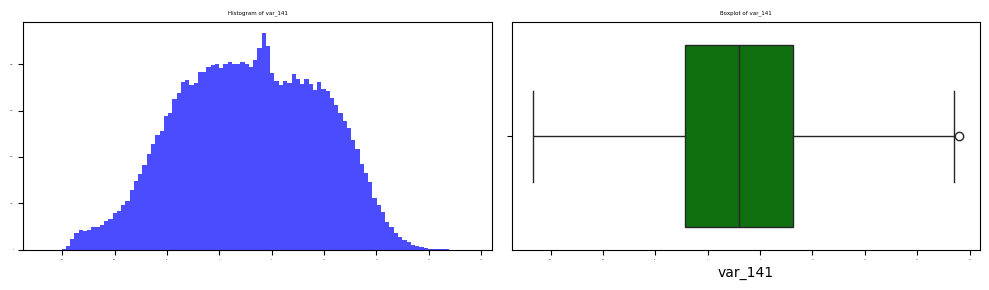

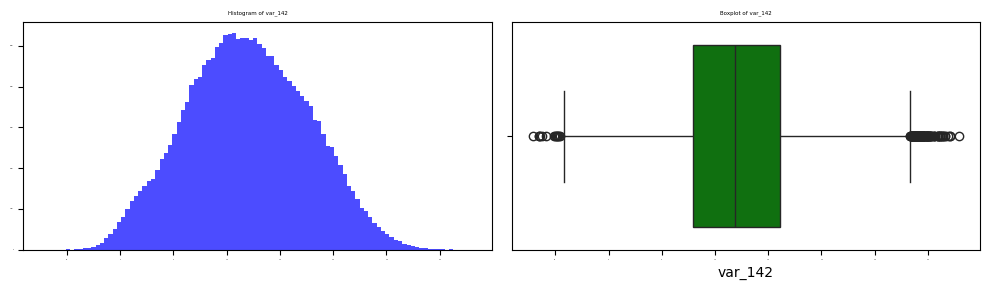

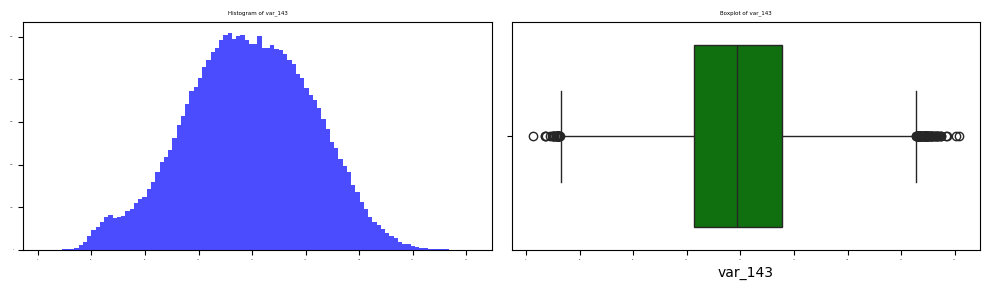

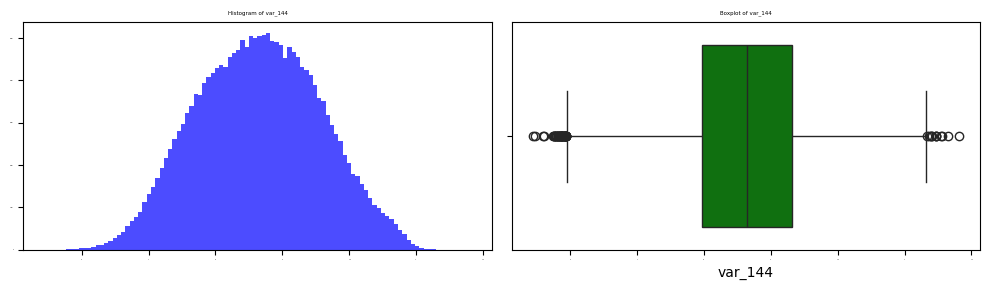

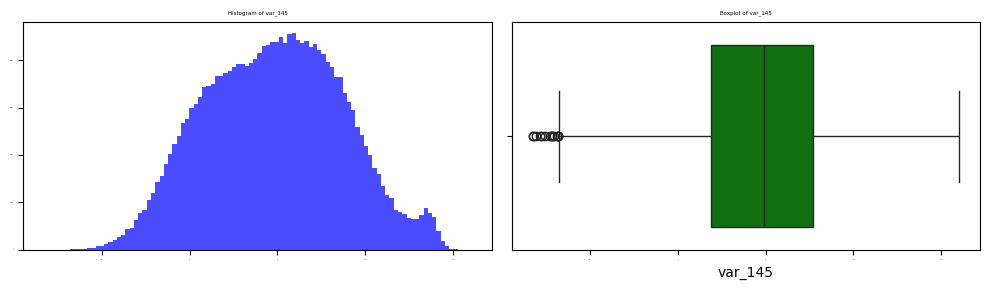

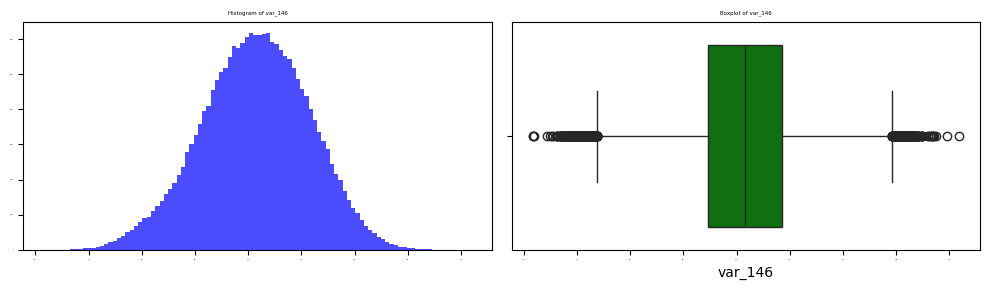

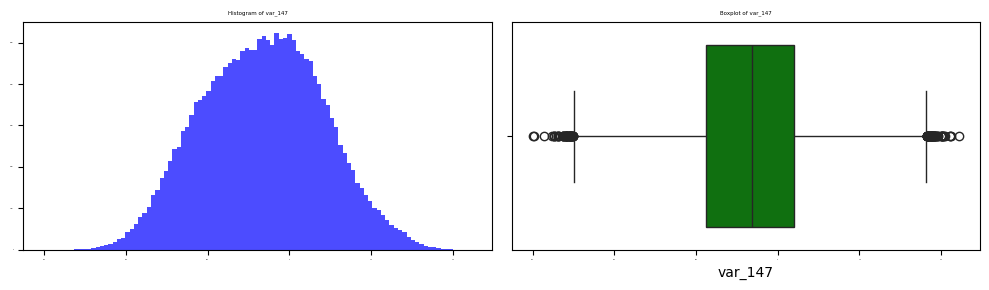

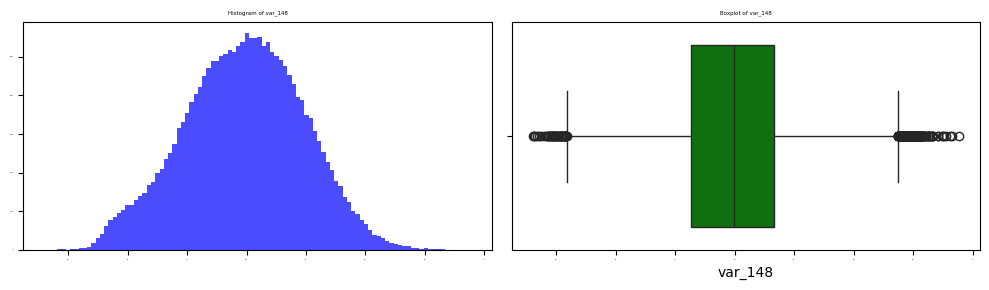

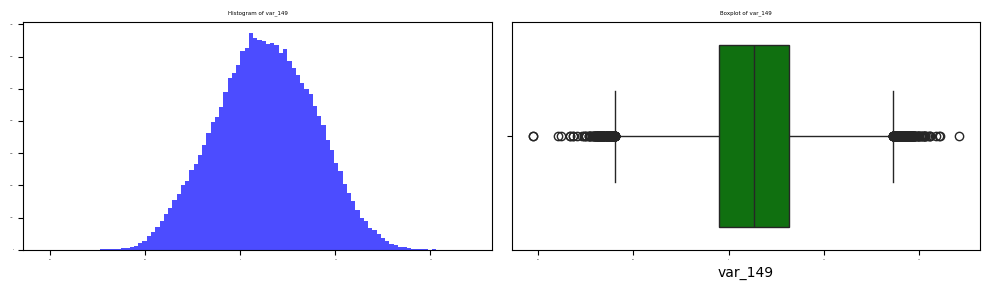

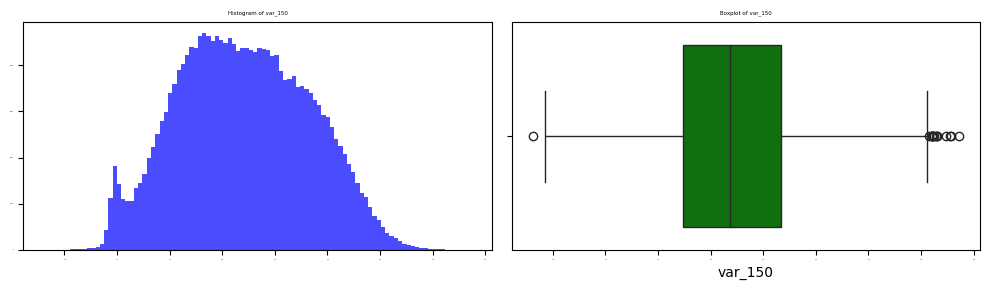

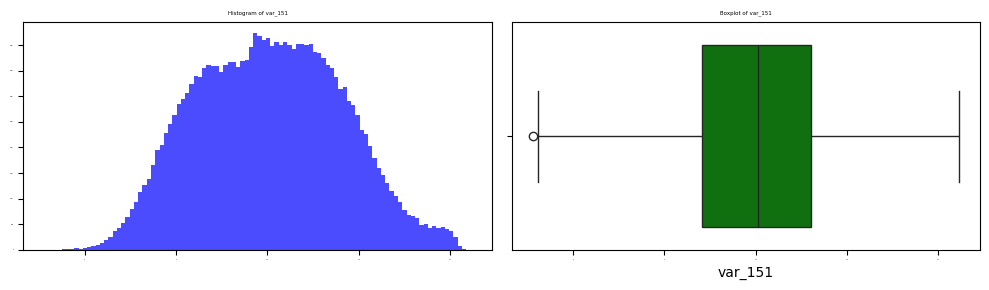

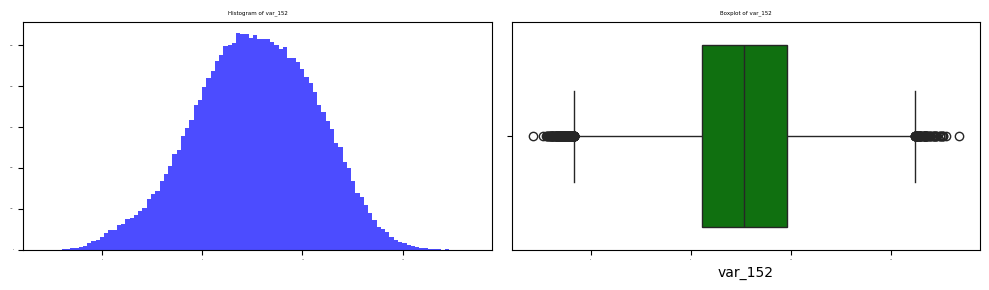

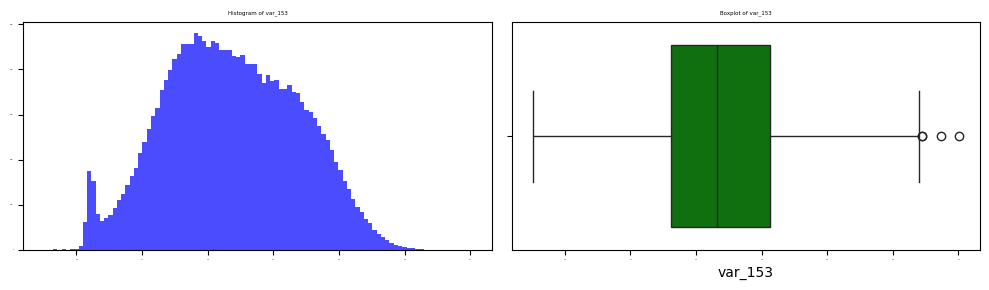

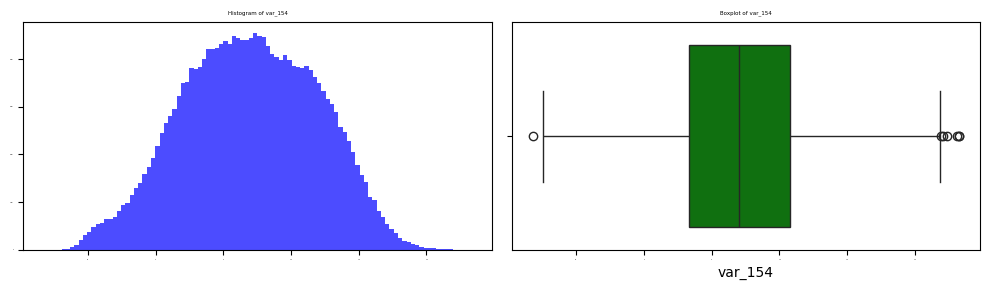

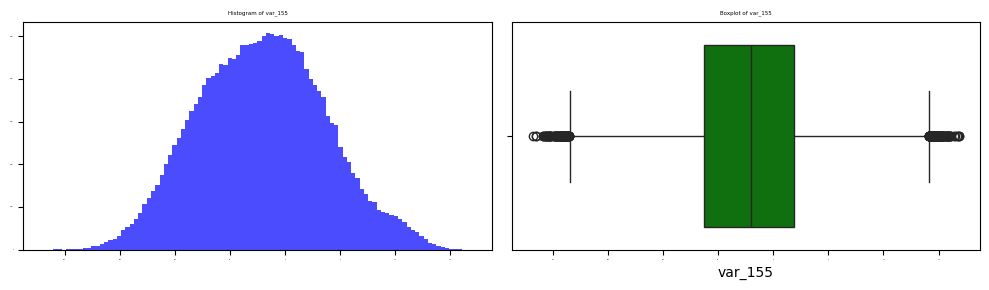

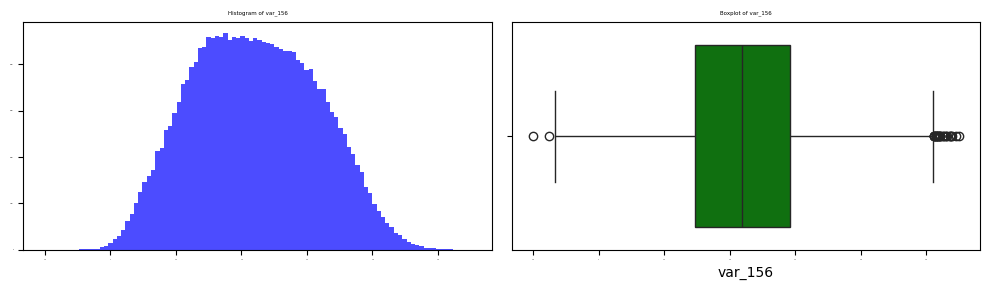

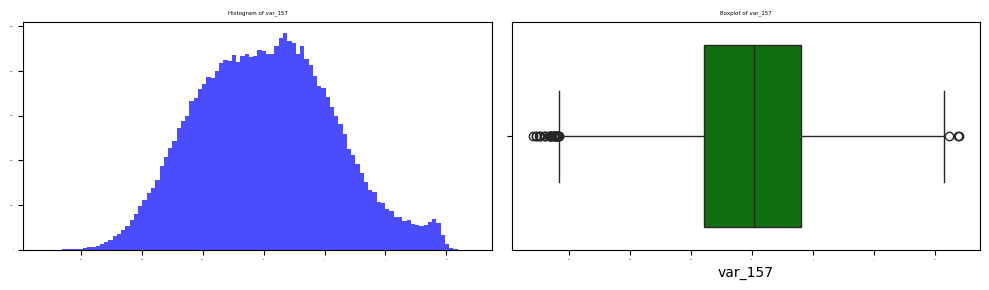

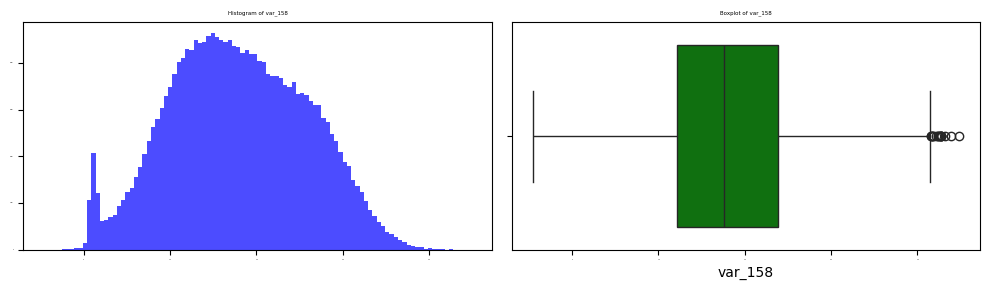

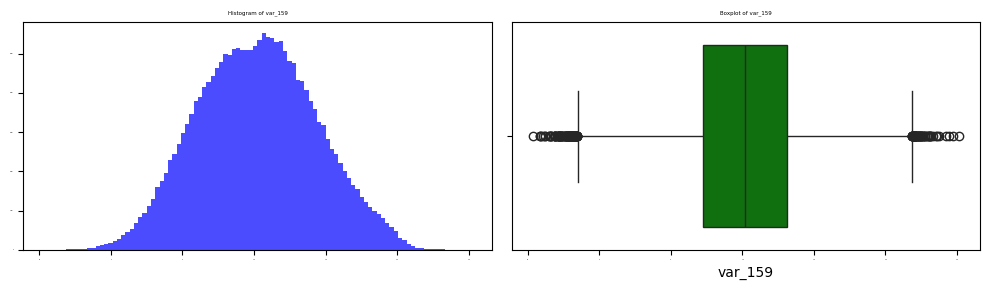

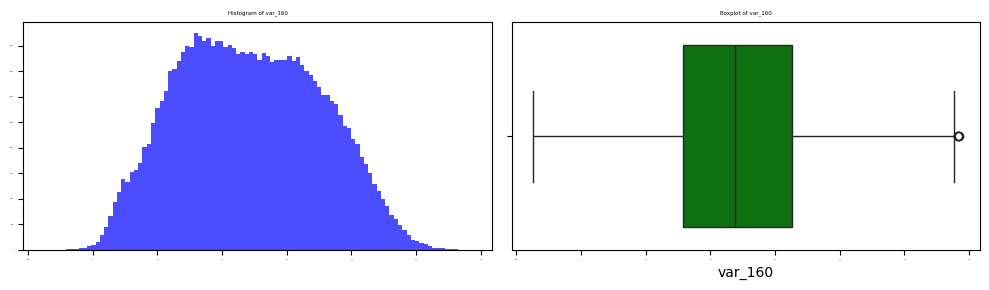

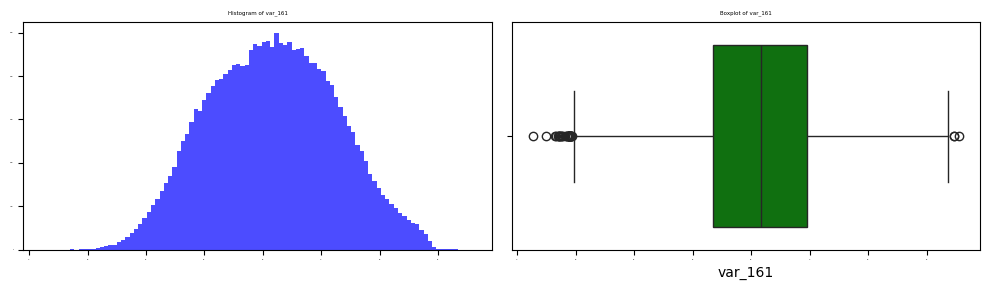

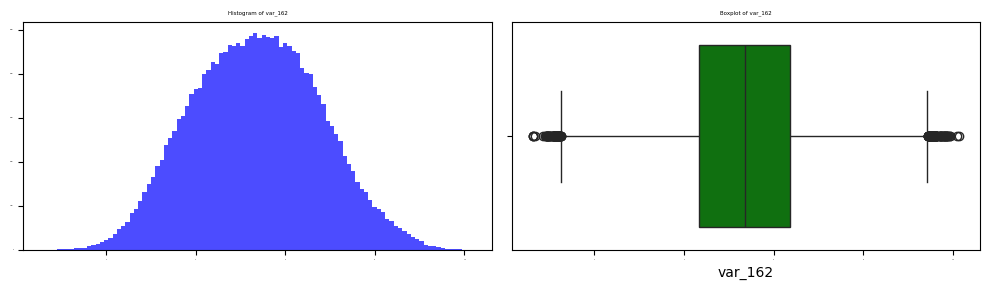

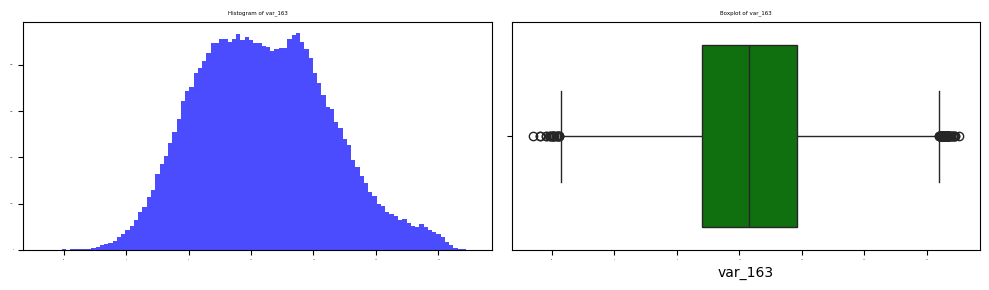

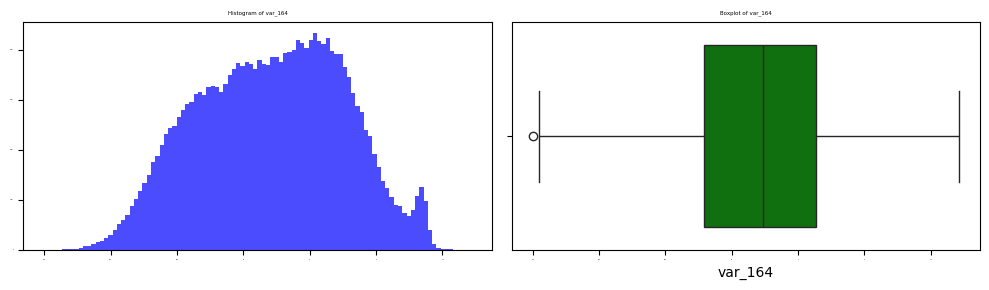

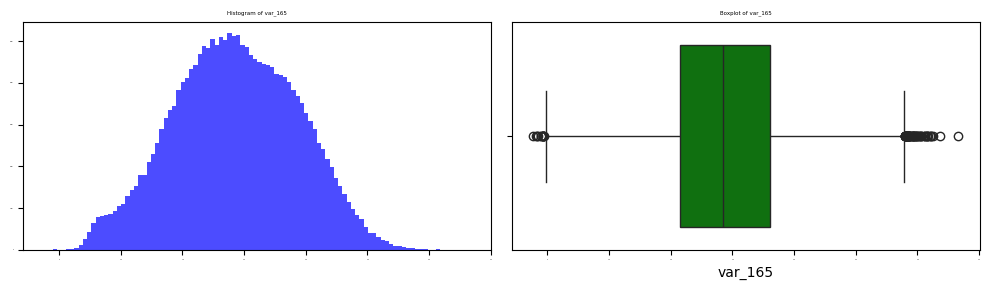

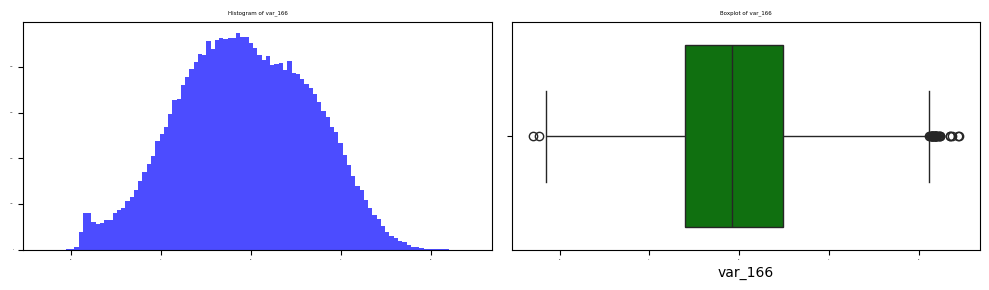

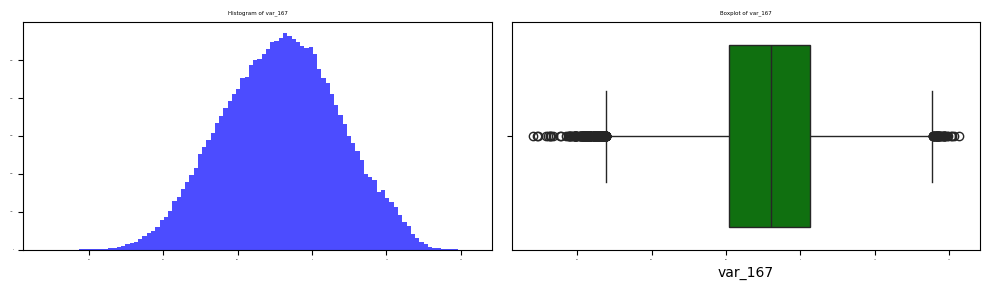

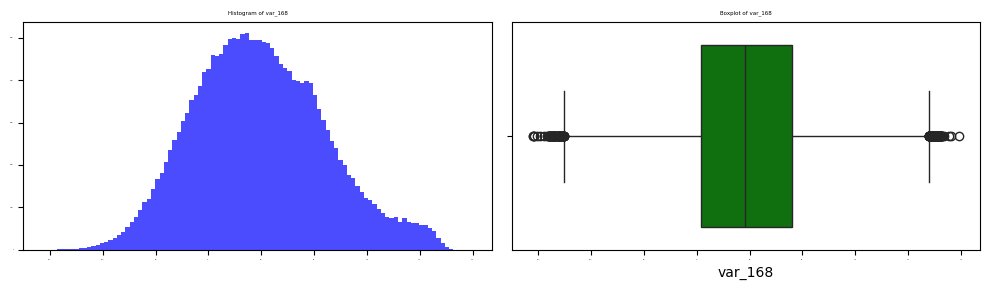

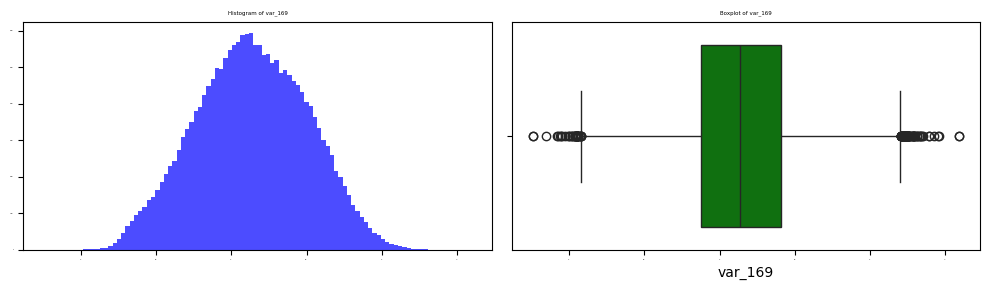

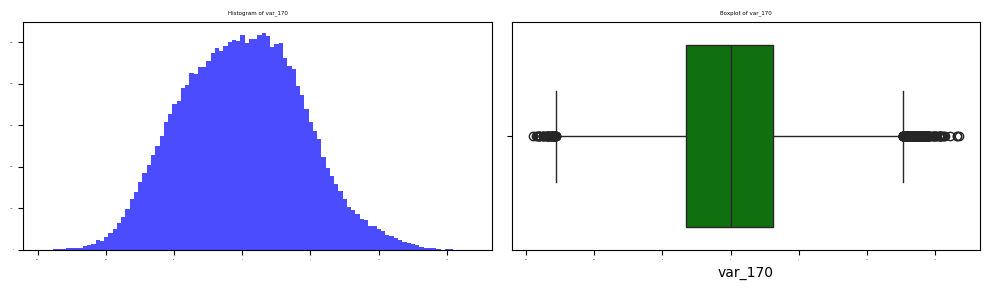

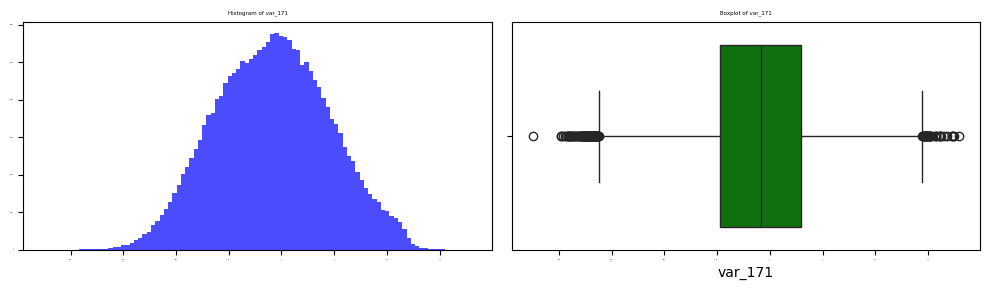

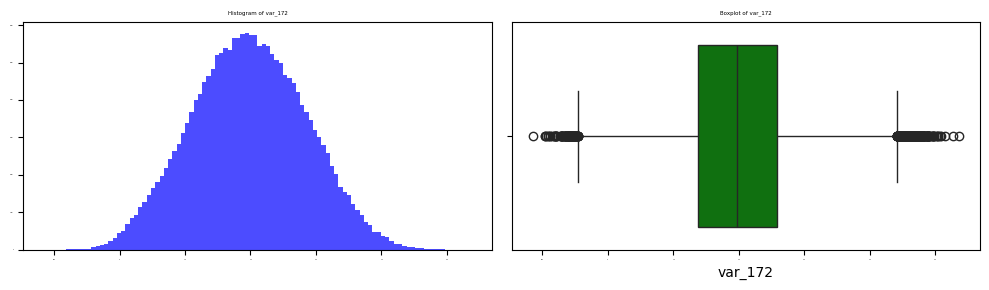

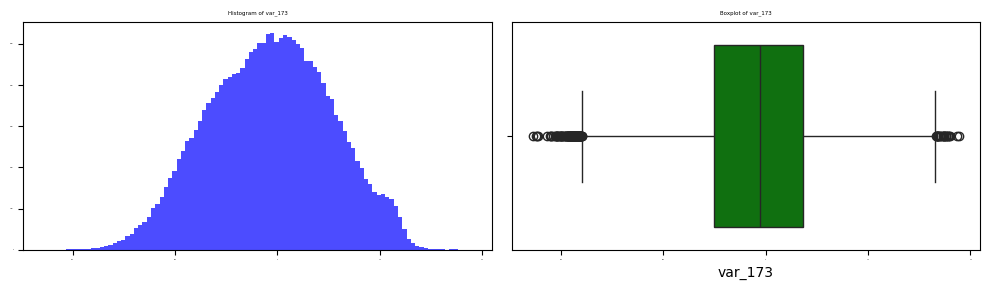

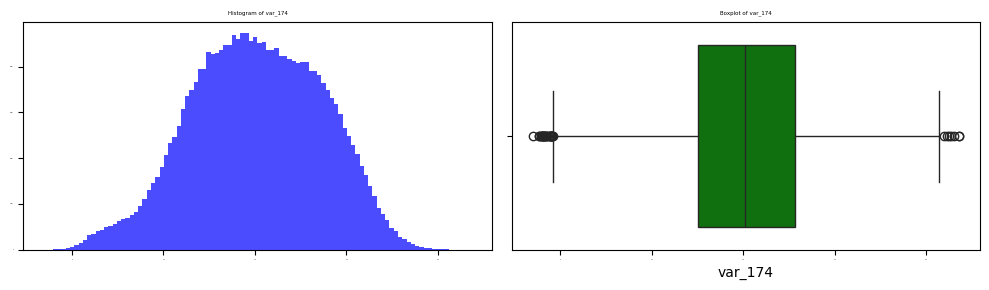

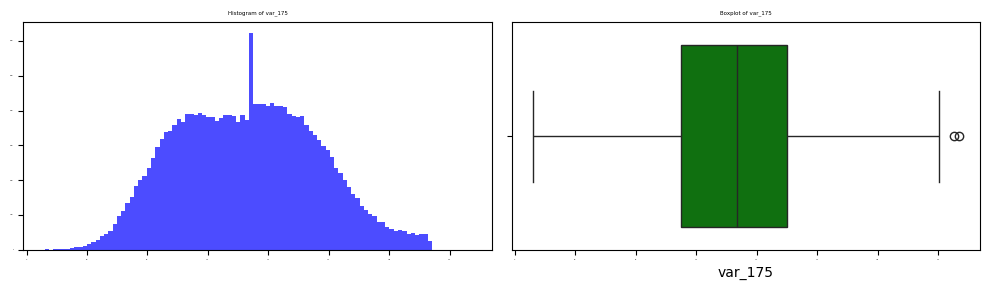

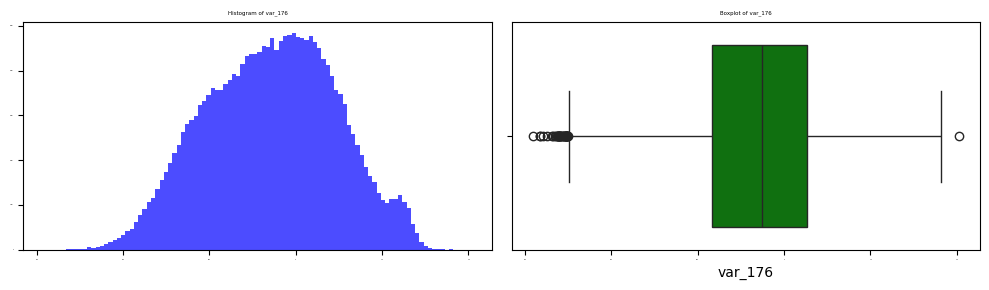

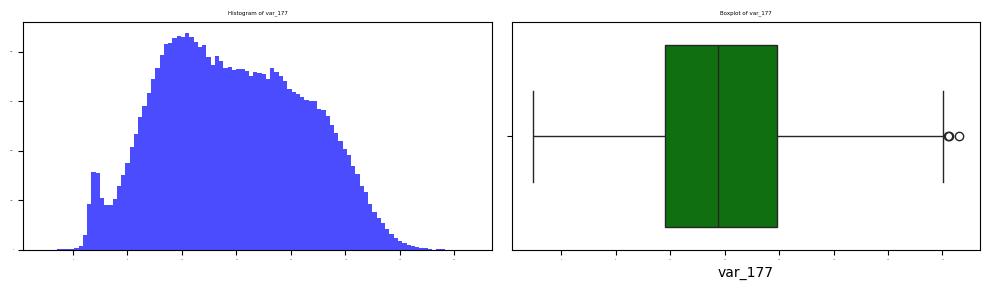

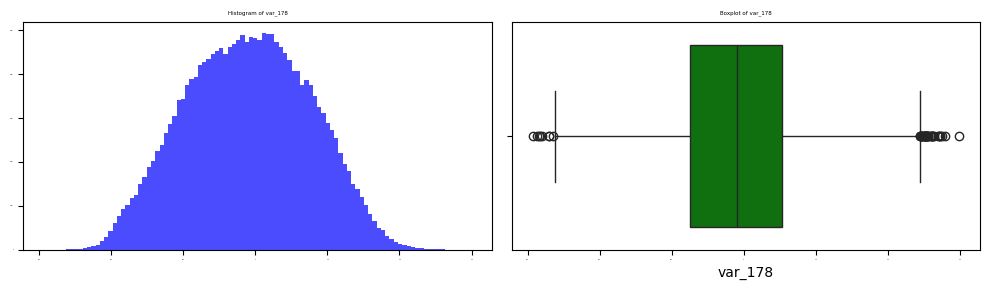

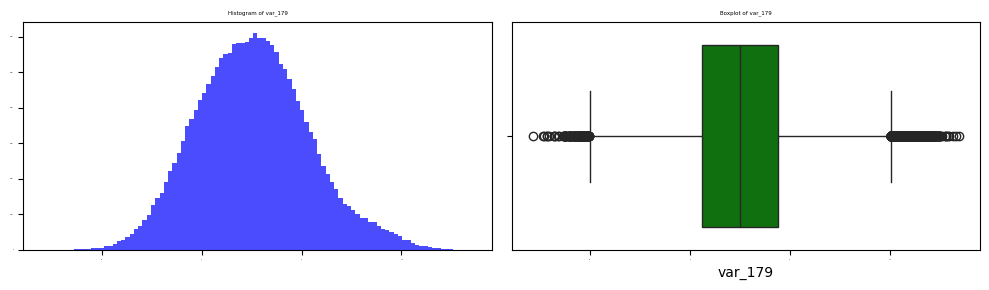

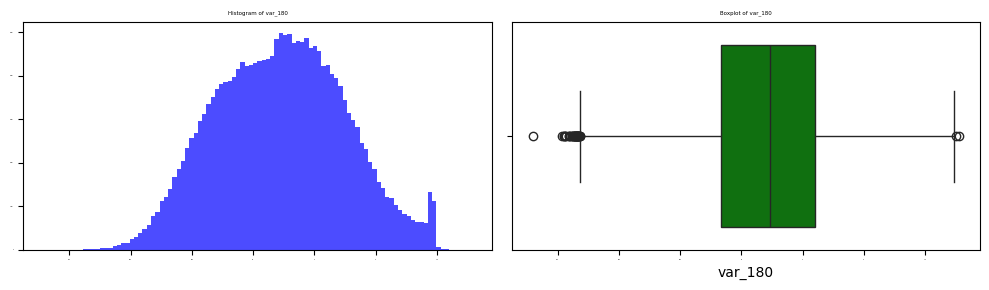

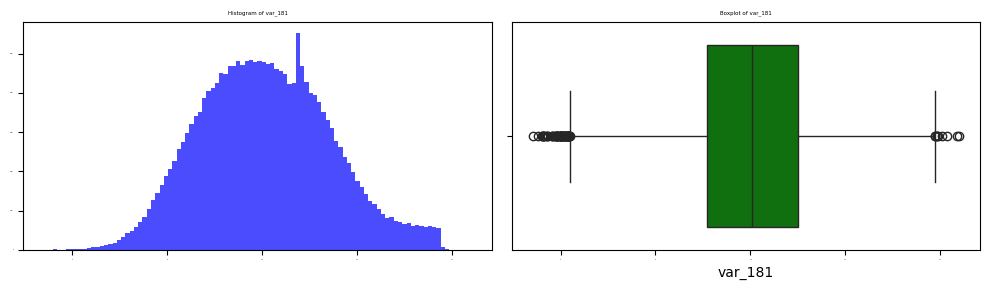

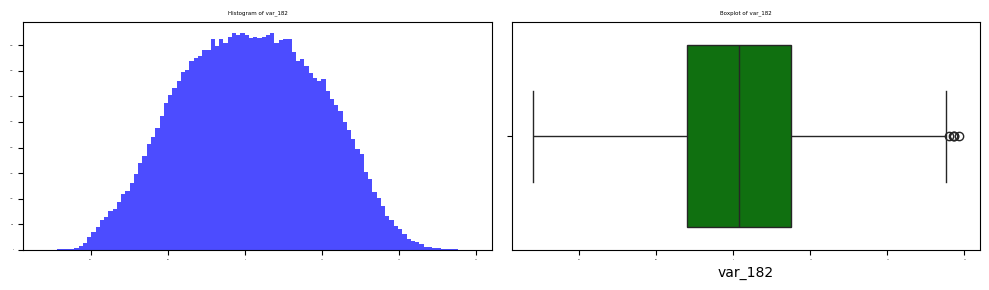

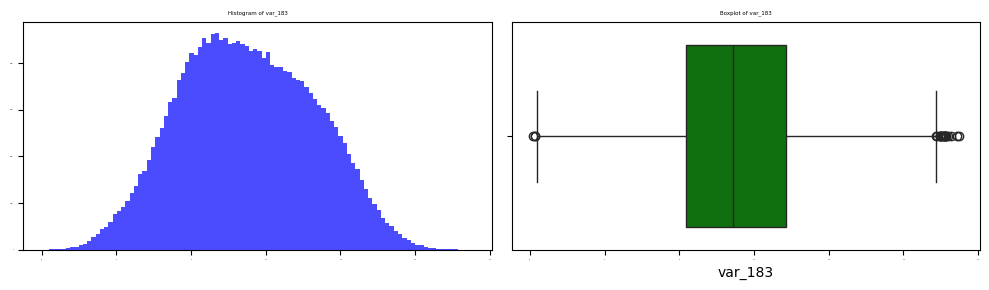

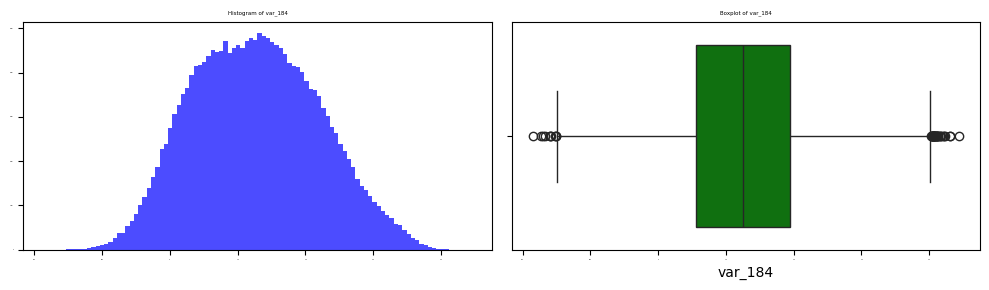

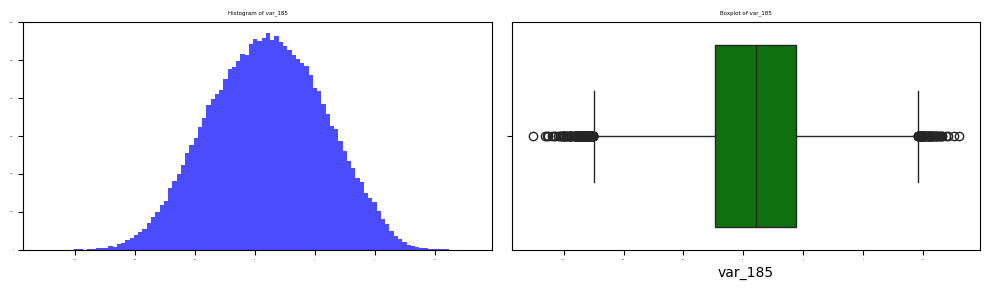

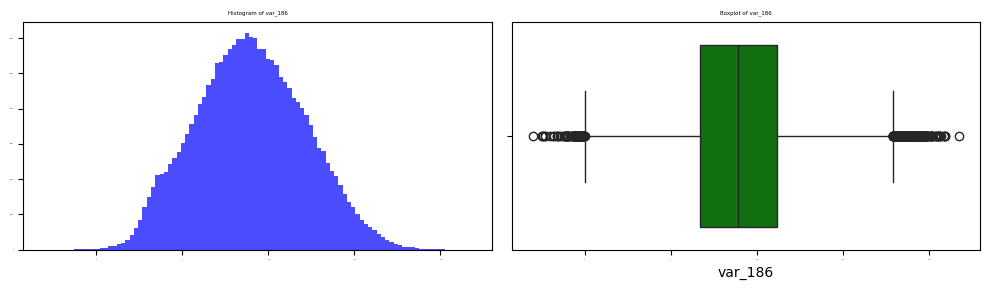

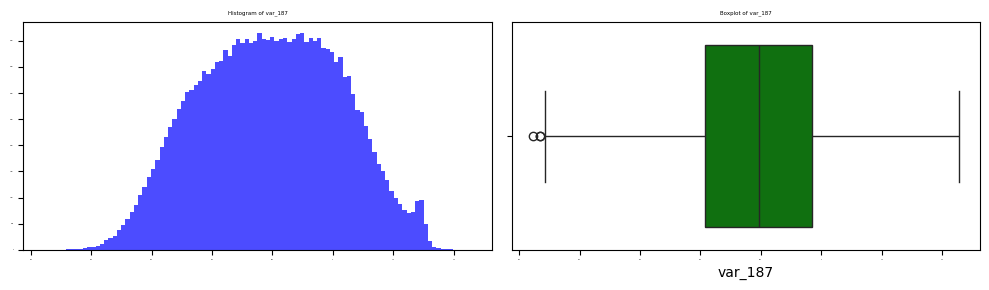

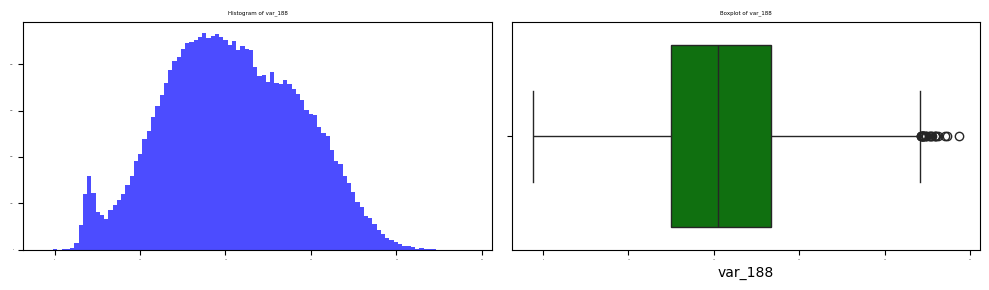

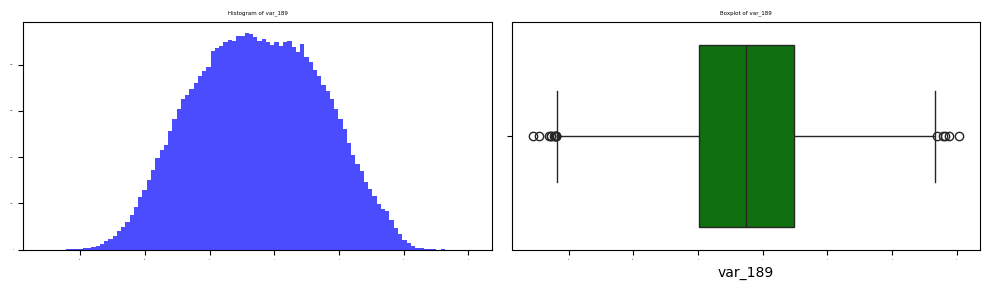

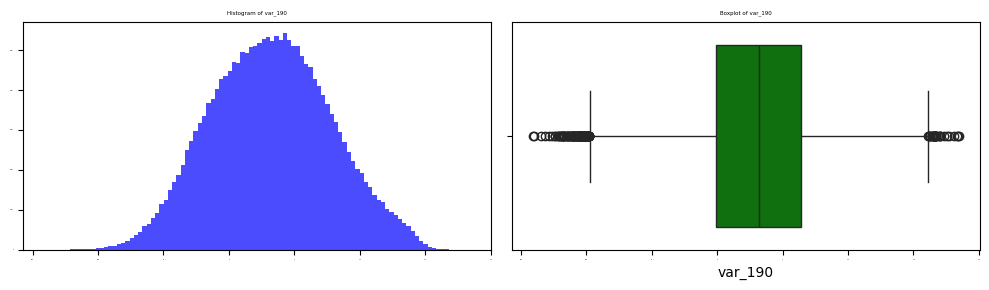

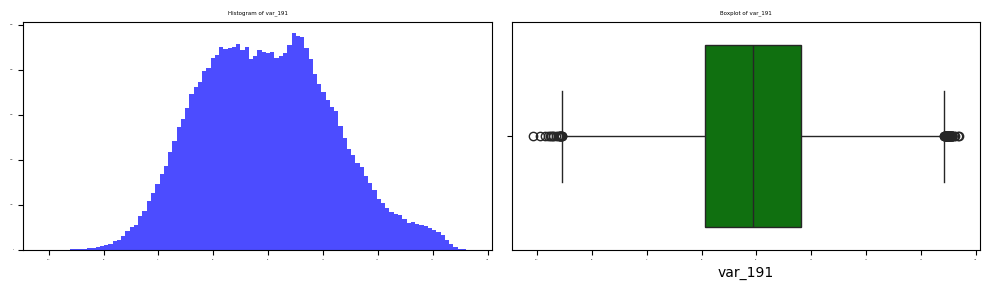

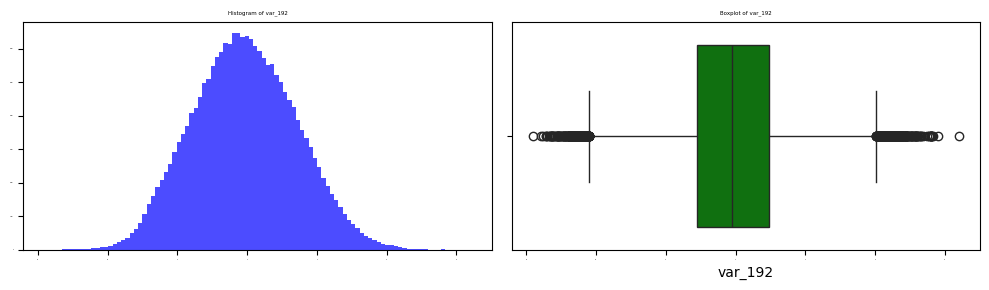

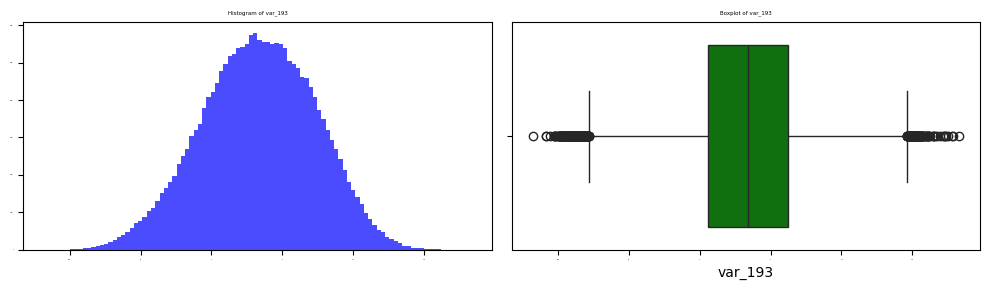

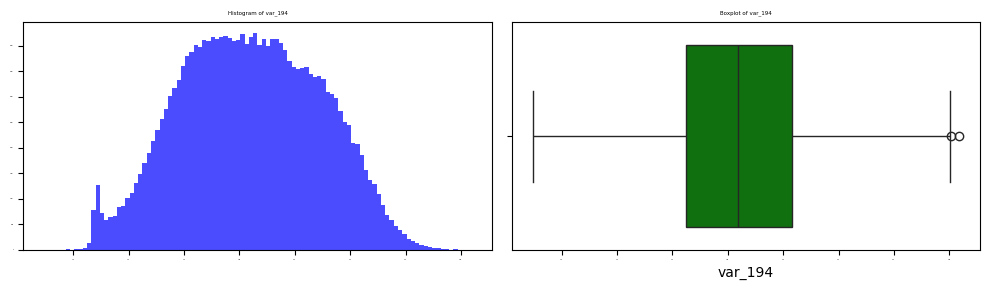

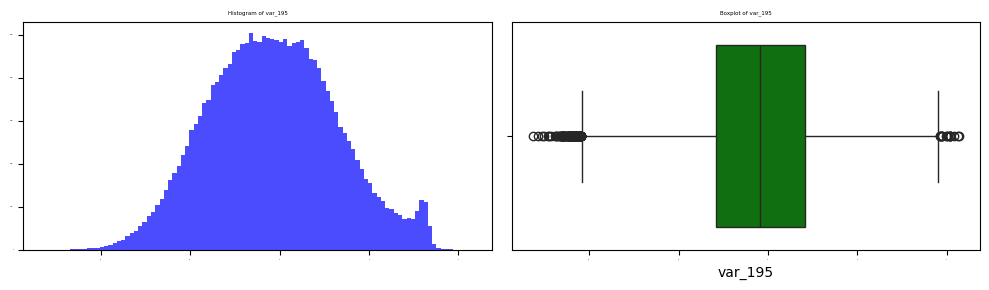

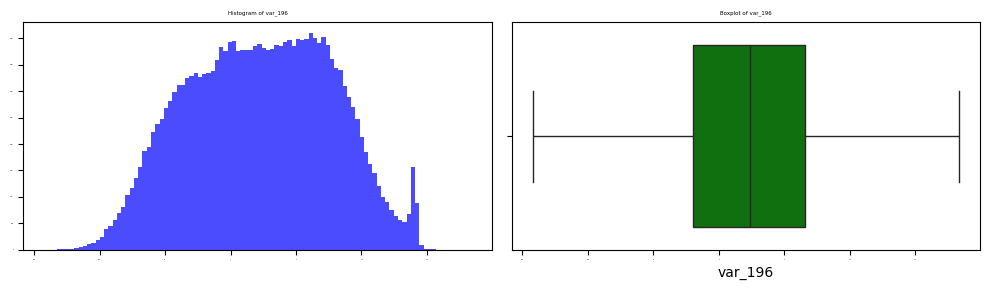

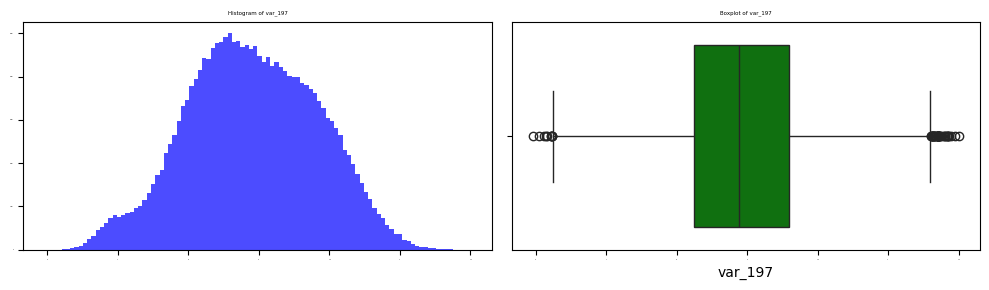

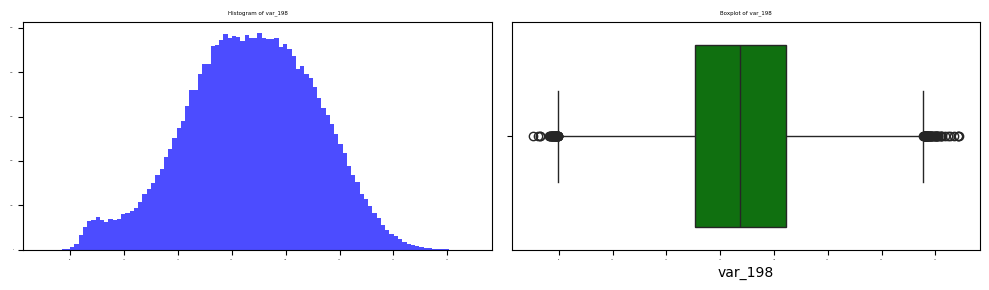

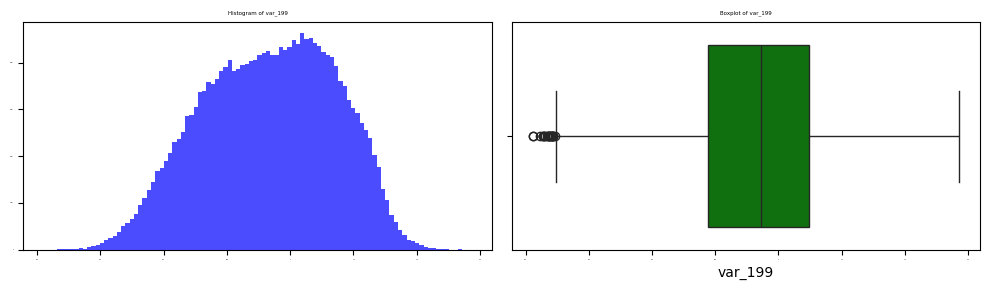

In [21]:
def plot_feature_distribution(df, feature, rows, cols):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
    
    # Histogram
    ax1.hist(df[feature], bins=100, color='blue', alpha=0.7)
    ax1.set_title(f'Histogram of {feature}')
    
    # Boxplot
    sns.boxplot(x=df[feature], ax=ax2, color='green')
    ax2.set_title(f'Boxplot of {feature}')
    
    plt.tight_layout()
    plt.show()

features = [col for col in train.columns if col.startswith('var_')]

# Set rows and columns for subplot grid (can be adjusted)
rows, cols = 2, 1  # Change as needed

for feature in features:
    plot_feature_distribution(train, feature, rows, cols)

In [9]:
# Inspect data types of all features

train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [11]:
# List row count where data is missing per feature and identify candidates for imputation

train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

Frequency distribution w.r.t. target


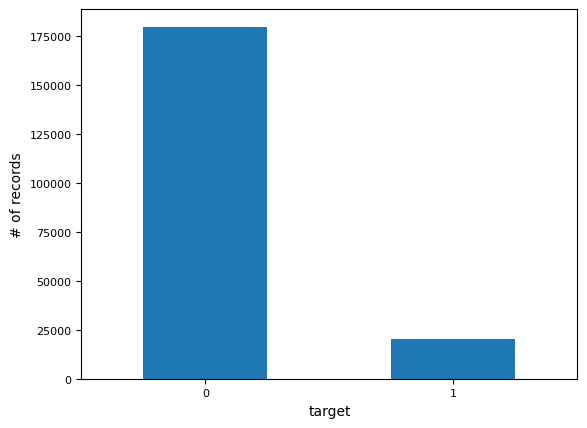

In [12]:
# Show frequency distribution of target variable to understand if the data set is imbalanced or not

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
train['target'].value_counts().plot.bar(ylabel = '# of records', fontsize = 8)
plt.xticks([0,1], [0,1], rotation='horizontal')

print("Frequency distribution w.r.t. target")

In [13]:
# Remove ID_code given it just identifies a transaction and doesn't fit much to estimate target

train2 = train.copy().drop(['ID_code'], axis=1)
train2['target'] = train2['target'].astype('category')
train2.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,1

In [16]:
# Randomly sample records in the training dataset

train2_sample = train2.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.01))
train2_sample.head()

/var/folders/n8/j5ztf5qj7m113hkd7hdp59pm0000gn/T/ipykernel_91255/1790618163.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train2_sample = train2.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.01))
/var/folders/n8/j5ztf5qj7m113hkd7hdp59pm0000gn/T/ipykernel_91255/1790618163.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train2_sample = train2.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.01))


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
110333,0,12.9494,-7.2833,10.6109,4.9960,10.7351,-13.2377,5.3452,14.9005,1.9054,4.9599,-9.2815,-5.9233,13.9059,10.8152,4.4431,14.6679,7.4704,-2.3710,21.5058,6.1688,13.5223,2.2732,4.8375,2.7696,9.4083,13.3732,1.9181,1.4193,4.6604,6.5391,-12.0733,13.1516,-0.4548,18.7623,11.1470,-2.9242,1.4224,5.9788,13.6396,-6.6811,-14.2059,16.1505,10.6252,11.3419,10.0306,-35.1360,11.5119,-28.8447,10.2622,24.2739,12.5423,0.0203,-3.7668,6.8814,9.5519,11.6835,12.0748,7.4373,2.8533,8.4877,13.2811,-0.8928,2.6356,0.8738,9.4769,4.7735,6.8554,11.3875,5.0227,-7.0136,23.2837,0.7921,-3.4459,15.4108,12.5178,17.9439,-10.1186,21.1857,2.4430,12.1292,9.5331,16.2222,-5.2458,-8.4876,-4.5159,15.4032,5.2100,5.2678,5.5087,3.7824,-21.2096,7.2620,21.8071,10.3088,8.8864,-0.5357,8.4594,34.9659,3.0989,-0.2495,-19.3042,15.9215,14.6416,1.8975,11.5473,6.1280,8.2857,13.1033,14.3819,14.3137,4.2031,7.3248,1.5707,11.2951,3.9223,2.6871,3.8775,8.4943,-22.0415,4.5661,28.3151,10.5065,2.9662,-0.5936,8.2736,11.9505,13.1235,-3.4634,1.2350,14.5787,11.3557,0.5862,8.1908,6.5349,-11.8599,8.1274,6.3014,17.7245,-3.7089,23.7183,-2.3780,4.4943,22.7480,11.5753,7.3512,1.0430,12.7066,4.1982,3.8266,1.6548,15.7869,9.1734,8.9813,18.9628,6.0686,-1.3618,12.1703,-11.3251,21.6360,4.7490,30.0258,5.5680,3.9118,5.5008,-3.8844,27.6199,2.9906,-13.3792,4.3479,5.7476,-2.6684,9.2714,11.6678,4.5662,25.0932,10.0786,-13.1338,9.5134,3.2365,3.8657,-10.2360,12.4557,3.6412,3.8868,7.9882,-3.0250,7.2196,-10.6805,15.5924,1.2183,3.3730,7.3042,0.0720,-2.1095,19.4838,-1.0454,8.2927,8.8922,14.8352,14.8420
118600,0,10.0081,-1.8727,10.4047,7.4562,11.2356,5.5766,5.2675,25.4922,4.2039,7.4043,-3.3662,-4.9780,14.2006,-0.9299,4.7788,14.2204,10.1799,-4.2051,19.6105,17.1374,21.3666,21.5446,-0.2124,2.1793,4.0379,13.3203,-12.6178,1.3180,5.8160,2.8092,-10.0845,12.6705,-0.9214,9.3928,10.8058,-0.6617,8.6437,7.5017,11.1256,-2.9835,-5.5667,15.9040,10.6205,11.5302,6.9777,-38.9082,5.5294,-12.6028,31.6246,22.5804,13.0054,16.9779,9.6817,6.7831,-10.1779,11.1111,20.3662,7.1230,0.6877,8.0033,16.0896,-24.1274,-1.3855,2.2748,6.3190,1.4072,6.7509,12.5576,5.0188,-8.5108,25.3153,0.2721,8.2843,19.9932,-3.3018,18.0825,4.9855,21.3202,6.5362,12.7712,10.8959,16.2029,-16.4371,14.1661,8.0466,20.5337,6.1658,7.9924,10.0140,3.5975,-24.7127,6.9975,7.4446,10.6385,13.2285,0.4385,-4.7393,25.3227,1.6625,-2.4999,-11.2333,18.5201,32.7544,1.2412,10.1486,3.5483,5.9835,18.4186,14.3632,16.6630,1.3769,8.0818,3.4249,0.7669,3.6282,1.6283,1.1974,12.5401,-11.9929,-3.8496,35.5020,7.7183,4.7622,11.8177,2.6187,

In [29]:
# Identify correlation between features

corr = train2_sample.corr(numeric_only=True).abs()
corr_unstacked = corr.unstack()
sorted_corr = corr_unstacked.sort_values(ascending=False).drop_duplicates()
print(sorted_corr[0:20])

sorted_corr = sorted_corr.to_frame().reset_index()
print(sorted_corr[0:11])

var_0    var_0      1.000000
var_114  var_158    0.094014
var_145  var_152    0.088764
var_108  var_102    0.088084
var_19   var_15     0.087891
var_84   var_94     0.085305
var_149  var_9      0.085129
var_150  var_105    0.083163
var_144  var_171    0.082482
var_167  var_126    0.081101
var_158  var_165    0.081100
var_70   var_133    0.079903
var_169  var_27     0.077751
var_48   var_192    0.077614
var_95   var_10     0.076823
var_119  var_99     0.076299
var_19   var_98     0.076205
var_41   var_13     0.075955
var_132  var_84     0.075500
var_164  var_78     0.075383
dtype: float64
    level_0  level_1         0
0     var_0    var_0  1.000000
1   var_114  var_158  0.094014
2   var_145  var_152  0.088764
3   var_108  var_102  0.088084
4    var_19   var_15  0.087891
5    var_84   var_94  0.085305
6   var_149    var_9  0.085129
7   var_150  var_105  0.083163
8   var_144  var_171  0.082482
9   var_167  var_126  0.081101
10  var_158  var_165  0.081100


1    var_114
2    var_145
3    var_108
4     var_19
5     var_84
Name: level_0, dtype: object
1    var_158
2    var_152
3    var_102
4     var_15
5     var_94
Name: level_1, dtype: object


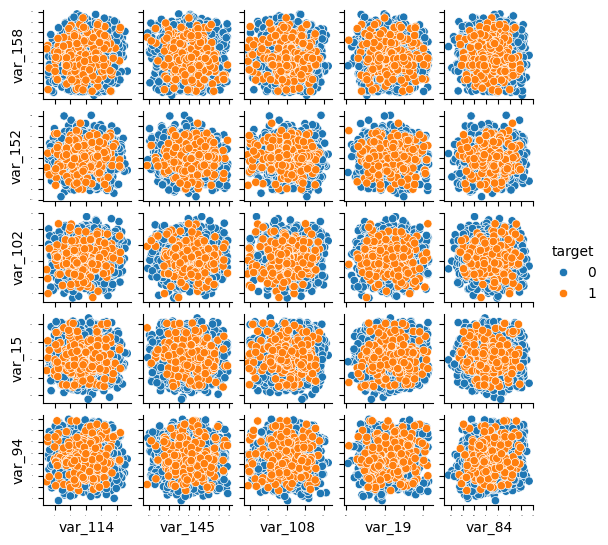

In [30]:
import seaborn as sns

x_top5 = sorted_corr['level_0'][1:6]
print(x_top5)

y_top5 = sorted_corr['level_1'][1:6]
print(y_top5)

sns.pairplot(data=train2_sample, x_vars=x_top5, y_vars=y_top5, hue="target", height = 1.1)